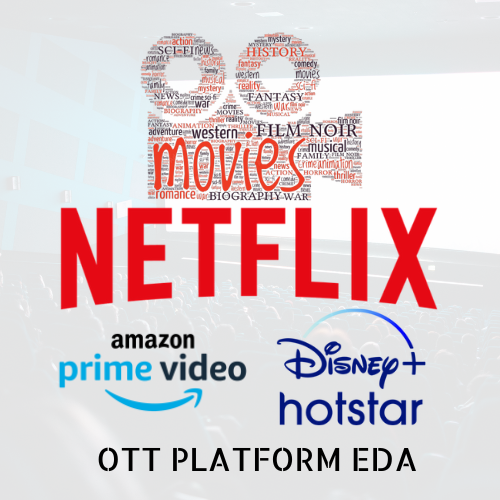

### Import the dataset's with requirments libarires

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
import datetime as dt
import missingno as msno
plt.rcParams['figure.dpi'] = 140

In [2]:
netflix = pd.read_csv('netflix_titles.csv')
amazon = pd.read_csv('amazon_prime_titles.csv')
disney = pd.read_csv('disney_plus_titles.csv')

In [3]:
netflix.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8406,s8407,Movie,The Love Guru,Marco Schnabel,"Mike Myers, Jessica Alba, Justin Timberlake, B...","United Kingdom, Germany, United States","November 20, 2019",2008,PG-13,87 min,"Comedies, Sports Movies","Raised on an ashram in India, a self-styled lo..."
4562,s4563,Movie,Dev.D,Anurag Kashyap,"Abhay Deol, Mahie Gill, Kalki Koechlin, Sindba...",India,"October 1, 2018",2009,TV-MA,137 min,"Dramas, International Movies, Romantic Movies","Because they come from different castes, the s..."
4991,s4992,TV Show,A.I.C.O.,Kazuya Murata,"Haruka Shiraishi, Yusuke Kobayashi, Makoto Fur...",Japan,"March 9, 2018",2018,TV-14,1 Season,"Anime Series, International TV Shows",Everything Aiko knew was a lie. Now she's join...
5123,s5124,Movie,Pottersville,Seth Henrikson,"Michael Shannon, Judy Greer, Thomas Lennon, Ro...",United States,"December 15, 2017",2017,PG-13,86 min,"Comedies, Independent Movies",A man's drunken romp in a gorilla suit gets hi...
4188,s4189,Movie,Echcharikkai,Sarjun,"Sathyaraj, Varalakshmi Sarathkumar, Kishore Ku...",India,"January 15, 2019",2018,TV-14,127 min,"International Movies, Thrillers","After kidnapping a millionaire’s daughter, two..."


In [4]:
amazon.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2378,s2379,TV Show,Gecko's Garage 3D - Vehicle Cartoons for Kids,NaN,NaN,NaN,NaN,2021,ALL,1 Season,Kids,Enjoy this collection of educational kids cart...
3861,s3862,Movie,Gopichand Chanakya,Thiru,"Gopichand, Mehreen Pirzada, Nassar, Rajesh Kha...",NaN,NaN,2019,13+,145 min,"Action, International",The movie is about Arjun (Undercover Raw Agent...
951,s952,Movie,Soldier of Night,Dan Wolman,"Iris Kaner, Ze'ev Shimshoni",NaN,NaN,1986,R,90 min,Drama,Terror ends a romance for a beautiful woman wh...
2742,s2743,Movie,Cyber Bully,Charles Binamé,"Emily Osment, Kay Panabaker, Meaghan Rath, Kel...",NaN,NaN,2011,NaN,87 min,Drama,When 17-year-old Taylor receives a laptop for ...
7174,s7175,TV Show,"Eerie, Indiana",NaN,"Mary-Margaret Humes, Omri Katz, Justin Shenkarow",NaN,NaN,1993,TV-Y7,1 Season,"Comedy, Drama, Kids",Teenager Marshall Teller discovers and encount...


In [5]:
disney.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
157,s158,Movie,What the Shark?,NaN,Robert Davi,NaN,"July 23, 2021",2020,TV-PG,44 min,"Animals & Nature, Documentary",What the Shark? dives deep into the environmen...
858,s859,Movie,Disneynature Crimson Wing,"Matthew Aeberhard, Leander Ward",Mariella Frostrup,"United States, United Kingdom","November 12, 2019",2008,G,78 min,"Animals & Nature, Documentary, Family",A million flamingos struggle to survive in the...
634,s635,TV Show,America's National Parks,NaN,C.T. Taylor,United States,"January 15, 2020",2015,TV-14,1 Season,"Animals & Nature, Docuseries",Experience the breathtaking landscapes and maj...
328,s329,Movie,Max Keeble's Big Move,Tim Hill,"Alex D. Linz, Larry Miller, Jamie Kennedy, Zen...",United States,"December 25, 2020",2001,PG,88 min,"Comedy, Family","After a week of creating mayhem, Max has to fa..."
587,s588,Movie,Sea Scouts,Dick Lundy,NaN,United States,"April 3, 2020",1939,TV-PG,8 min,"Animation, Family",Donald and his nephews encounter a shark. See ...


## Filter the every data with Movies & TV Shows

In [6]:
netflix_shows=netflix[netflix['type']=='TV Show']
netflix_movies=netflix[netflix['type']=='Movie']

amazon_movies=amazon[amazon['type']=='Movie']
amazon_shows=amazon[amazon['type']=='TV Show']

disney_movies=disney[disney['type']=='Movie']
disney_shows=disney[disney['type']=='TV Show']

In [7]:
netflix_shows.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2691,s2692,TV Show,Brews Brothers,NaN,"Alan Aisenberg, Mike Castle, Carmen Flood, Mar...",United States,"April 10, 2020",2020,TV-MA,1 Season,TV Comedies,Two rival brothers must work together to keep ...
5843,s5844,TV Show,Hibana: Spark,NaN,"Kento Hayashi, Kazuki Namioka, Mugi Kadowaki, ...",Japan,"June 2, 2016",2016,TV-MA,1 Season,"International TV Shows, TV Dramas",A dramatic series about friendship and conflic...
5812,s5813,TV Show,Caught on Camera,NaN,Nick Wallis,United Kingdom,"August 15, 2016",2015,TV-MA,3 Seasons,"British TV Shows, Crime TV Shows, Docuseries","Nick Wallis presents crimes caught on CCTV, ce..."
3327,s3328,TV Show,A Year In Space,NaN,Scott Kelly,United States,"November 1, 2019",2015,TV-PG,1 Season,"Docuseries, International TV Shows, Science & ...",Two astronauts attempt to brave a life in Eart...
5372,s5373,TV Show,Ari Shaffir: Double Negative,Eric Abrams,Ari Shaffir,United States,"July 18, 2017",2017,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"Wry yet thoughtful, comedian Ari Shaffir bring..."


In [8]:
netflix_movies.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3620,s3621,Movie,Jim Jefferies : BARE,Shannon Hartman,Jim Jefferies,United States,"August 6, 2019",2014,TV-MA,77 min,Stand-Up Comedy,Nothing is sacred in this show from Australian...
2541,s2542,Movie,Ali & Alia,Hussein El Ansary,"Khalifa Albhri, Neven Madi, Talal Mahmood, Saw...",United Arab Emirates,"May 12, 2020",2019,TV-14,106 min,"Dramas, International Movies, Romantic Movies",Drugs and addiction endanger the love — and li...
5140,s5141,Movie,DreamWorks Home: For the Holidays,NaN,"Rachel Crow, Mark Whitten, Kelly Clarkson, Ana...",United States,"December 1, 2017",2017,TV-Y,46 min,"Children & Family Movies, Comedies, Music & Mu...",Oh takes it upon himself to introduce Christma...
3994,s3995,Movie,Vince and Kath and James,Theodore Boborol,"Julia Barretto, Joshua Garcia, Ronnie Alonte, ...",Philippines,"March 21, 2019",2016,TV-PG,115 min,"International Movies, Romantic Movies","Love can be complicated, especially when Vince..."
4161,s4162,Movie,Surga Yang Tak Dirindukan 2,"Hanung Bramantyo, Meisa Felaroze","Fedi Nuril, Raline Shah, Laudya Cynthia Bella,...",Indonesia,"January 28, 2019",2017,TV-14,119 min,"Dramas, Faith & Spirituality, International Mo...","In this sequel to the award-winning 2015 film,..."


In [9]:
amazon_movies.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2067,s2068,Movie,Jackie & Ryan,Ami Canaan Mann,"Katherine Heigl, Ben Barnes, Clea DuVall",NaN,NaN,2015,PG-13,91 min,Drama,A modern day train hopper fighting to be a suc...
9110,s9111,Movie,Salvador,Oliver Stone,"James Woods, Jim Belushi, Michael Murphy, John...",NaN,NaN,1986,R,123 min,Drama,Compelling drama based on the real experiences...
4215,s4216,Movie,We Still Say Grace,"Brad Helmink, John Rauschelbach","Bruce Davison, Holly Taylor, Rita Volk",NaN,NaN,2020,18+,94 min,"Horror, Suspense",Maggie (Holly Taylor) has spent her entire lif...
4761,s4762,Movie,Signs of Life,Werner Herzog,"Peter Brogle, Wolfgang Reichmann, Athina Zacha...",NaN,NaN,1981,16+,90 min,"Action, Drama",A wounded German paratrooper named Stroszek is...
7494,s7495,Movie,Fighting Temptations,Jonathan Lynn,"Beyonce, Cuba Gooding Jr., Wendell Pierce, Fai...",NaN,NaN,2003,PG-13,123 min,"Arts, Entertainment, and Culture, Comedy, Fait...",Darrin Hill returns to his hometown to claim t...


In [10]:
amazon_shows.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1574,s1575,TV Show,"Mud, Sweat & Gears",NaN,"Tom Ford, Jonny Smith",NaN,NaN,2015,13+,1 Season,"Special Interest, Unscripted",The competitive car show where each week hosts...
5698,s5699,TV Show,Southland Bounty Hunters,NaN,"Patrick Thomas, Zak Holman, Matthew Alvarez, T...",NaN,NaN,2021,16+,1 Season,Action,Patty Mayo is back bigger than ever with a ful...
326,s327,TV Show,Tiny Trucks,NaN,NaN,NaN,NaN,2020,ALL,2 Seasons,"Animation, Kids","Charlie the Crane, Billy the Bulldozer and Ed ..."
411,s412,TV Show,The Tunnel,NaN,NaN,NaN,NaN,2018,NR,3 Seasons,"Drama, Suspense",The emotionally charged finale of the acclaime...
519,s520,TV Show,The Neighbors [English Subbed] (4K UHD),NaN,"Bracha van Doesburgh, Daan Schuurmans, Thijs R...",NaN,NaN,2016,TV-NR,1 Season,"Drama, Suspense",After a year Eva comes out of a coma. Still su...


In [11]:
disney_movies.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1345,s1346,Movie,The Swap,Jay Karas,"Peyton List, Jacob Bertrand, Darrin Rose, Clai...",United States,"November 12, 2019",2016,TV-G,91 min,"Comedy, Coming of Age, Fantasy",Classmates Ellie and Jack unexplainably trigge...
170,s171,Movie,World's Most Dangerous Shark?,Kevin Bachar,Brain Cade,NaN,"July 16, 2021",2021,TV-14,44 min,"Animals & Nature, Documentary",Are Oceanic White Tips the most dangerous of a...
1082,s1083,Movie,Minutemen,Lev Spiro,"Jason Dolley, Luke Benward, Nicholas Braun, Ch...",United States,"November 12, 2019",2008,TV-G,91 min,"Action-Adventure, Comedy, Science Fiction",Three teen outcasts invent a time machine to s...
72,s73,Movie,Under Wraps,Alex Zamm,"Malachi Barton, Christian J. Simon, Sophia Ham...",NaN,"October 8, 2021",2021,TV-G,92 min,"Action-Adventure, Comedy, Kids",Three friends revive a mummy in a neighbor's b...
791,s792,Movie,Chip an' Dale,Jack Hannah,NaN,United States,"November 12, 2019",1947,TV-G,7 min,"Animation, Comedy, Family",Chip and Dale have to save their home from Don...


In [12]:
disney_shows.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
234,s235,TV Show,Spider-Man,NaN,"Christopher Daniel Barnes, Edward Asner, Linda...",United States,"May 3, 2021",1994,TV-Y7,5 Seasons,"Action-Adventure, Animation, Kids",A young man with spider-like abilities fights ...
1057,s1058,TV Show,Marvel's Avengers: Secret Wars (Shorts),NaN,NaN,NaN,"November 12, 2019",2016,TV-Y7,1 Season,"Action-Adventure, Animation, Kids",A new team of heroes joins the Avengers.
826,s827,TV Show,Disney Gravity Falls,NaN,"Kristen Schaal, Jason Morgan, Alex Hirsch",United States,"November 12, 2019",2011,TV-Y7,2 Seasons,"Action-Adventure, Animation, Comedy",Dipper and Mabel spend the summer with Grunkle...
465,s466,TV Show,Wild Sri Lanka,NaN,Paul McGann,United Kingdom,"July 24, 2020",2016,TV-PG,1 Season,"Animals & Nature, Docuseries",This three-part series reveals the spectacular...
639,s640,TV Show,Wild Russia,NaN,Liam Teeling,NaN,"January 15, 2020",2018,TV-PG,1 Season,"Animals & Nature, Docuseries","From mountains to desert, volcanoes to ice, ex..."


## Finding Mising Values

#### 1. Netflix data == director null rate: 29.91% || cast null rate: 9.37% || country null rate: 9.44% || date_added null rate: 0.11% || rating null rate: 0.05% || duration null rate: 0.03%

#### >> Netflix_Movies == director null rate: 2.13% || cast null rate: 5.39% || country null rate: 5.00% || rating null rate: 0.02% || duration null rate: 0.03%
#### >> Netflix_Shows == director null rate: 27.77% || cast null rate: 3.97% || country null rate: 4.44% || date_added null rate: 0.11% || rating null rate: 0.05%


#### 2. Amazon data == director null rate: 21.53% || cast null rate: 12.75% || country null rate: 93.05% || date_added null rate: 98.4% || rating null rate: 3.49%

#### >> Amazon_Movies == director null rate: 2.36% || cast null rate: 7.9% || country null rate: 74.94% || date_added null rate: 80.66% || rating null rate: 3.42%
#### >> Amazon_Shows == director null rate: 19.18% || cast null rate: 4.85% || country null rate: 18.11% || date_added null rate: 17.74% || rating null rate: 0.06%

#### 3. Disney data == director null rate: 32.62% || cast null rate: 13.1% || country null rate: 15.1% || date_added null rate: 0.21% || rating null rate: 0.21%

#### >> Disney_Movies == director null rate: 5.17% || cast null rate: 8.21% || country null rate: 7.31% || rating null rate: 0.07%
#### >> Disney_Shows == director null rate: 27.45% || cast null rate: 4.9% || country null rate: 7.79% || date_added null rate: 0.21% || rating null rate: 0.14%

In [13]:
netflix.info()
amazon.info()
disney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          

In [14]:
netflix_movies.info()
amazon_movies.info()
disney_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6131 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6131 non-null   object
 1   type          6131 non-null   object
 2   title         6131 non-null   object
 3   director      5943 non-null   object
 4   cast          5656 non-null   object
 5   country       5691 non-null   object
 6   date_added    6131 non-null   object
 7   release_year  6131 non-null   int64 
 8   rating        6129 non-null   object
 9   duration      6128 non-null   object
 10  listed_in     6131 non-null   object
 11  description   6131 non-null   object
dtypes: int64(1), object(11)
memory usage: 622.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7814 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7814 non-null   object
 1   type          

In [15]:
netflix_shows.info()
amazon_shows.info()
disney_shows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2676 entries, 1 to 8803
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       2676 non-null   object
 1   type          2676 non-null   object
 2   title         2676 non-null   object
 3   director      230 non-null    object
 4   cast          2326 non-null   object
 5   country       2285 non-null   object
 6   date_added    2666 non-null   object
 7   release_year  2676 non-null   int64 
 8   rating        2674 non-null   object
 9   duration      2676 non-null   object
 10  listed_in     2676 non-null   object
 11  description   2676 non-null   object
dtypes: int64(1), object(11)
memory usage: 271.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1854 entries, 17 to 9666
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1854 non-null   object
 1   type         

In [16]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [17]:
amazon.isnull().sum()

show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [18]:
disney.isnull().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

In [19]:
netflix_movies.isnull().sum()

show_id           0
type              0
title             0
director        188
cast            475
country         440
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

In [20]:
amazon_movies.isnull().sum()

show_id            0
type               0
title              0
director         228
cast             764
country         7245
date_added      7798
release_year       0
rating           331
duration           0
listed_in          0
description        0
dtype: int64

In [21]:
disney_movies.isnull().sum()

show_id           0
type              0
title             0
director         75
cast            119
country         106
date_added        0
release_year      0
rating            1
duration          0
listed_in         0
description       0
dtype: int64

In [22]:
netflix_shows.isnull().sum()

show_id            0
type               0
title              0
director        2446
cast             350
country          391
date_added        10
release_year       0
rating             2
duration           0
listed_in          0
description        0
dtype: int64

In [23]:
amazon_shows.isnull().sum()

show_id            0
type               0
title              0
director        1854
cast             469
country         1751
date_added      1715
release_year       0
rating             6
duration           0
listed_in          0
description        0
dtype: int64

In [24]:
disney_shows.isnull().sum()

show_id           0
type              0
title             0
director        398
cast             71
country         113
date_added        3
release_year      0
rating            2
duration          0
listed_in         0
description       0
dtype: int64

In [25]:
netflix.shape

(8807, 12)

In [26]:
amazon.shape

(9668, 12)

In [27]:
disney.shape

(1450, 12)

In [28]:
netflix_movies.shape

(6131, 12)

In [29]:
amazon_movies.shape

(7814, 12)

In [30]:
disney_movies.shape

(1052, 12)

In [31]:
netflix_shows.shape

(2676, 12)

In [32]:
amazon_shows.shape

(1854, 12)

In [33]:
disney_shows.shape

(398, 12)

## Dealing with missing values

#### Replacement >>>>> Drops >>>>> Drops duplicates = Final Data

In [34]:
#Netflix
netflix['country'] = netflix['country'].fillna(netflix['country'].mode()[0])
netflix['cast'].replace(np.nan, 'N/A',inplace  = True)
netflix['director'].replace(np.nan, 'N/A',inplace  = True)
netflix.dropna(inplace=True)
netflix.drop_duplicates(inplace= True)

netflix_movies['country'] = netflix_movies['country'].fillna(netflix_movies['country'].mode()[0])
netflix_movies['cast'].replace(np.nan, 'N/A',inplace  = True)
netflix_movies['director'].replace(np.nan, 'N/A',inplace  = True)
netflix_movies['rating'].replace(np.nan, 'N/A',inplace  = True)
netflix_movies['duration'].replace(np.nan, 'N/A',inplace  = True)
netflix.dropna(inplace=True)
netflix.drop_duplicates(inplace= True)

netflix_shows['country'] = netflix_shows['country'].fillna(netflix_shows['country'].mode()[0])
netflix_shows['cast'].replace(np.nan, 'N/A',inplace  = True)
netflix_shows['director'].replace(np.nan, 'N/A',inplace  = True)
netflix_shows['date_added'].replace(np.nan, 'N/A',inplace  = True)
netflix_shows['rating'].replace(np.nan, 'N/A',inplace  = True)
netflix.dropna(inplace=True)
netflix.drop_duplicates(inplace= True)

#Amazon
amazon['country'] = amazon['country'].fillna(amazon['country'].mode()[0])
amazon['cast'].replace(np.nan, 'N/A',inplace  = True)
amazon['director'].replace(np.nan, 'N/A',inplace  = True)
amazon['rating'].replace(np.nan, 'N/A',inplace  = True)
amazon['date_added'].replace(np.nan, 'N/A',inplace  = True)
amazon.dropna(inplace=True)
amazon.drop_duplicates(inplace= True)

amazon_movies['country'] = amazon_movies['country'].fillna(amazon_movies['country'].mode()[0])
amazon_movies['cast'].replace(np.nan, 'N/A',inplace  = True)
amazon_movies['rating'].replace(np.nan, 'N/A',inplace  = True)
amazon_movies['director'].replace(np.nan, 'N/A',inplace  = True)
amazon_movies['date_added'].replace(np.nan, 'N/A',inplace  = True)
amazon.dropna(inplace=True)
amazon.drop_duplicates(inplace= True)

amazon_shows['country'] = amazon_shows['country'].fillna(amazon_shows['country'].mode()[0])
amazon_shows['director'].replace(np.nan, 'N/A',inplace  = True)
amazon_shows['cast'].replace(np.nan, 'N/A',inplace  = True)
amazon_shows['rating'].replace(np.nan, 'N/A',inplace  = True)
amazon_shows['date_added'].replace(np.nan, 'N/A',inplace  = True)
amazon.dropna(inplace=True)
amazon.drop_duplicates(inplace= True)

#Disney
disney['country'] = disney['country'].fillna(disney['country'].mode()[0])
disney['cast'].replace(np.nan, 'N/A',inplace  = True)
disney['director'].replace(np.nan, 'N/A',inplace  = True)
disney['rating'].replace(np.nan, 'N/A',inplace  = True)
disney['date_added'].replace(np.nan, 'N/A',inplace  = True)
disney.dropna(inplace=True)
disney.drop_duplicates(inplace= True)

disney_movies['country'] = disney_movies['country'].fillna(disney_movies['country'].mode()[0])
disney_movies['cast'].replace(np.nan, 'N/A',inplace  = True)
disney_movies['rating'].replace(np.nan, 'N/A',inplace  = True)
disney_movies['director'].replace(np.nan, 'N/A',inplace  = True)
disney_movies['date_added'].replace(np.nan, 'N/A',inplace  = True)
disney.dropna(inplace=True)
disney.drop_duplicates(inplace= True)

disney_shows['country'] = disney_shows['country'].fillna(disney_shows['country'].mode()[0])
disney_shows['director'].replace(np.nan, 'N/A',inplace  = True)
disney_shows['cast'].replace(np.nan, 'N/A',inplace  = True)
disney_shows['rating'].replace(np.nan, 'N/A',inplace  = True)
disney_shows['date_added'].replace(np.nan, 'N/A',inplace  = True)
disney.dropna(inplace=True)
disney.drop_duplicates(inplace= True)

#### For exampel

In [35]:
amazon.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## Now start the Viaulzation Journey

### 1. Create Brand Pattele

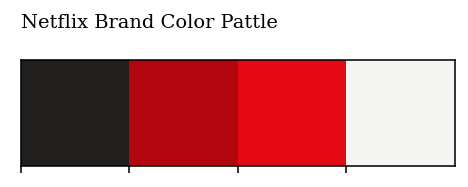

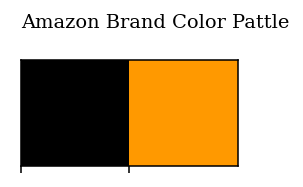

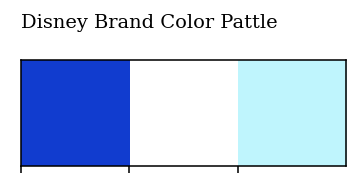

In [36]:
sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])
plt.title("Netflix Brand Color Pattle",loc='left',fontfamily='serif',fontsize=10,y=1.2)
plt.show()

sns.palplot(['#000000', '#FF9900'])
plt.title("Amazon Brand Color Pattle",loc='left',fontfamily='serif',fontsize=10,y=1.2)
plt.show()

sns.palplot(['#113CCF', '#FFFFFF', '#BFF5FD'])
plt.title("Disney Brand Color Pattle",loc='left',fontfamily='serif',fontsize=10,y=1.2)
plt.show()

### 2. Total Movies & TV-Shows

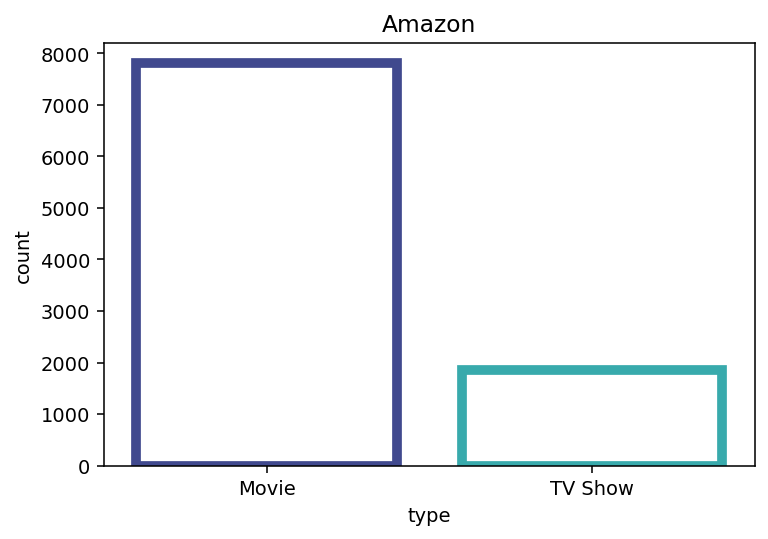

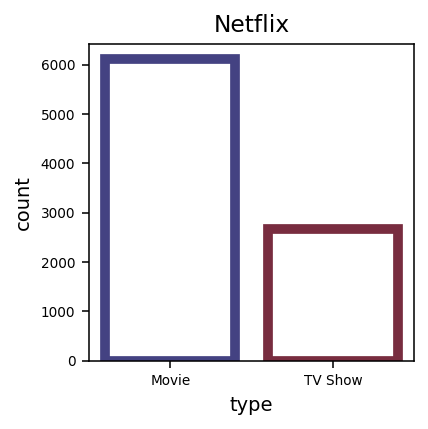

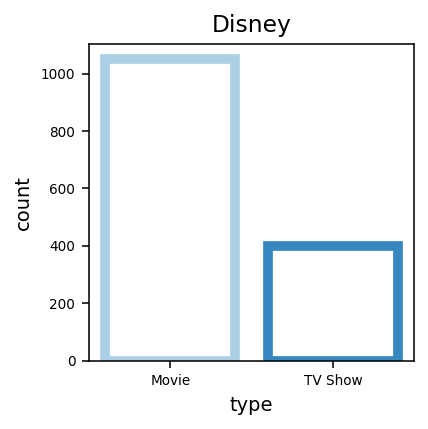

In [37]:
#Netflix
ax = sns.countplot(x="type",data=amazon,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("mako", 2)).set(title='Amazon')
plt.rcParams["figure.figsize"] = (3,3)
plt.rcParams["xtick.labelsize"] = 7
plt.rcParams["ytick.labelsize"] = 7
plt.show()

#Amazon
ax = sns.countplot(x="type",data=netflix,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("icefire", 2)).set(title='Netflix')
plt.rcParams["figure.figsize"] = (3,3)
plt.rcParams["xtick.labelsize"] = 7
plt.rcParams["ytick.labelsize"] = 7
plt.show()

#Disney
ax = sns.countplot(x="type",data=disney,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("Blues", 2)).set(title='Disney')
plt.rcParams["figure.figsize"] = (3,3)
plt.rcParams["xtick.labelsize"] = 7
plt.rcParams["ytick.labelsize"] = 7
plt.show()

### Content Update Over the Time

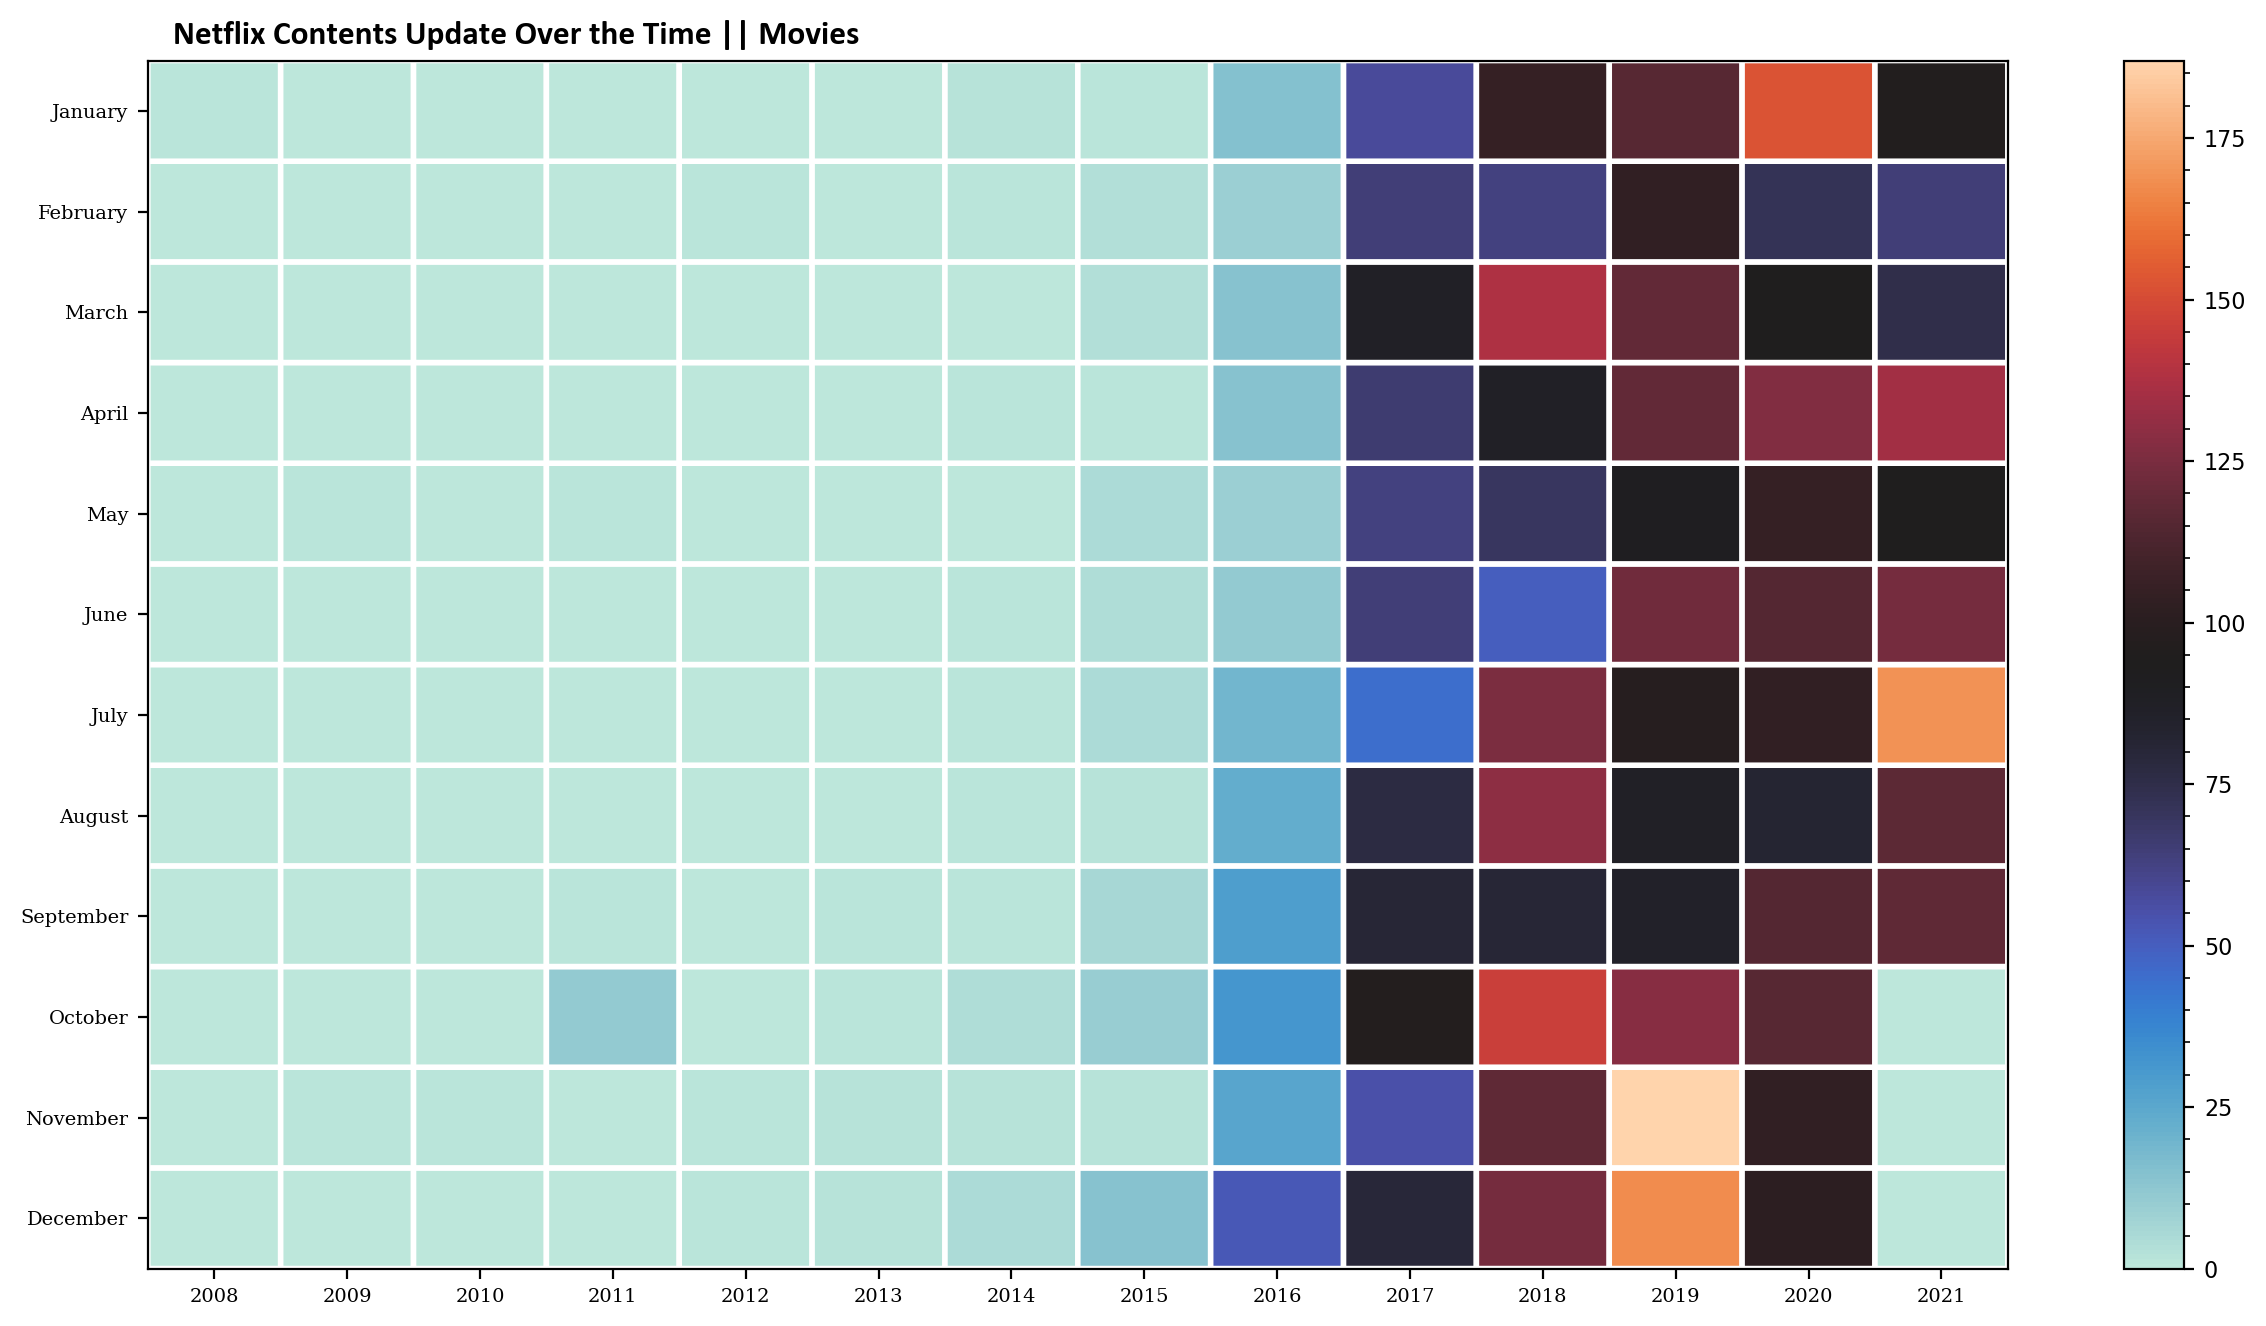

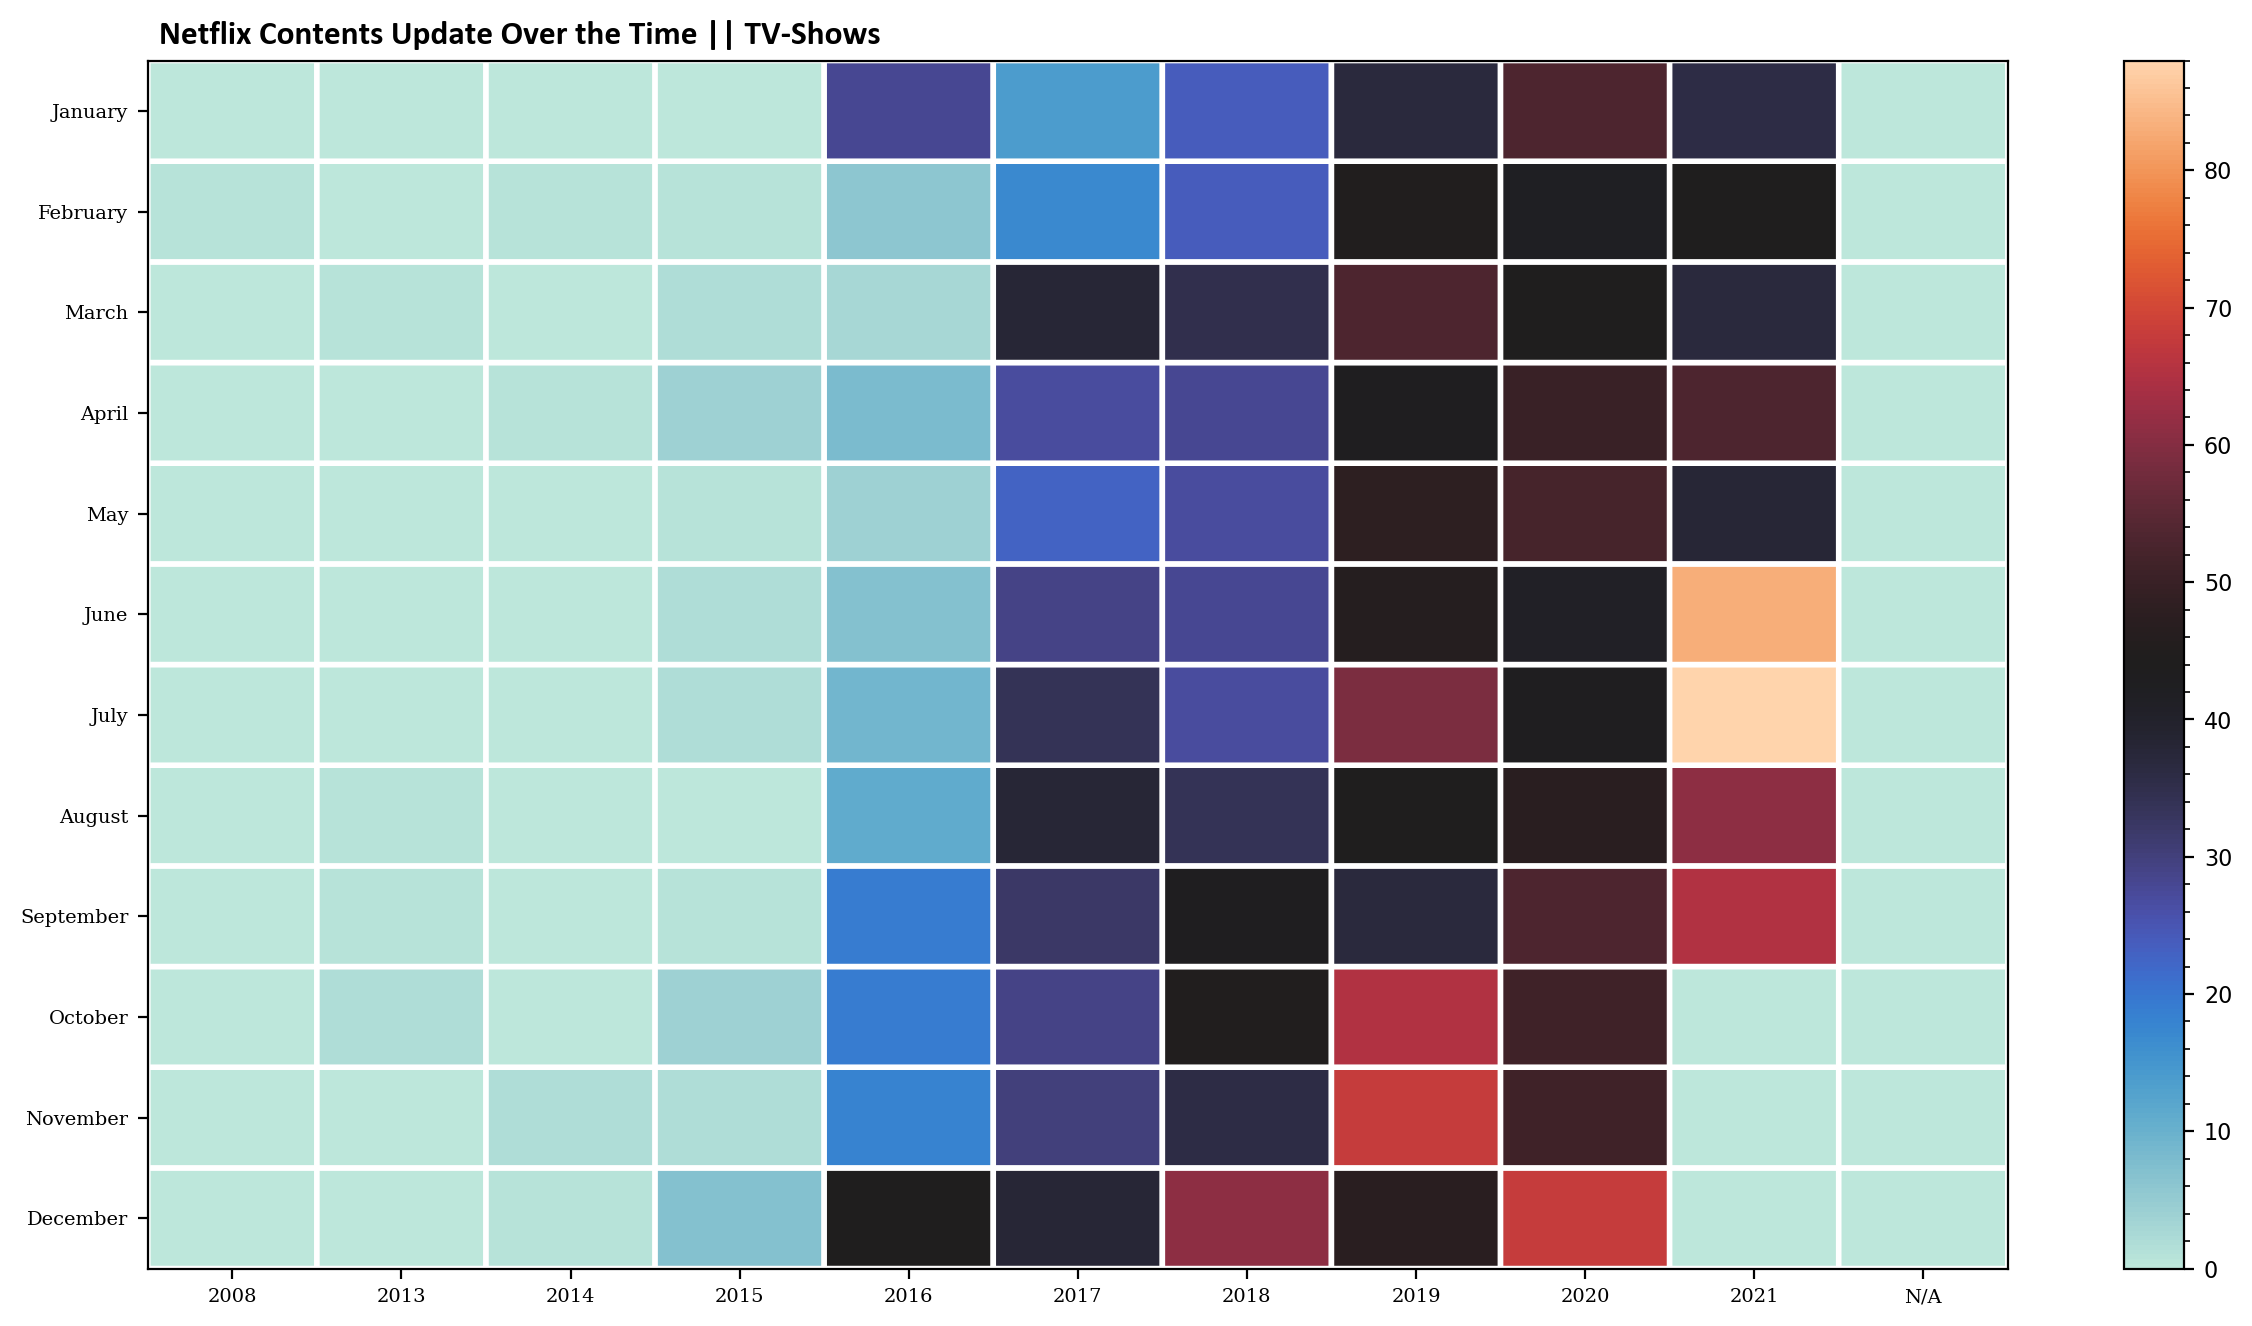

In [38]:
#For Example
#Netflix
n_date = netflix_movies[['date_added']].dropna()
n_date['year'] = n_date['date_added'].apply(lambda x : x.split(', ')[-1])
n_date['month'] = n_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
netflix = n_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(15, 8), dpi=200)
plt.pcolor(netflix, cmap='icefire', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(netflix.columns), 1), netflix.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(netflix.index), 1), netflix.index, fontsize=7, fontfamily='serif')
plt.title('Netflix Contents Update Over the Time || Movies ', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

n_date = netflix_shows[['date_added']].dropna()
n_date['year'] = n_date['date_added'].apply(lambda x : x.split(', ')[-1])
n_date['month'] = n_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
netflix = n_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(15, 8), dpi=200)
plt.pcolor(netflix, cmap='icefire', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(netflix.columns), 1), netflix.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(netflix.index), 1), netflix.index, fontsize=7, fontfamily='serif')
plt.title('Netflix Contents Update Over the Time || TV-Shows', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

### Movie rating Analysis

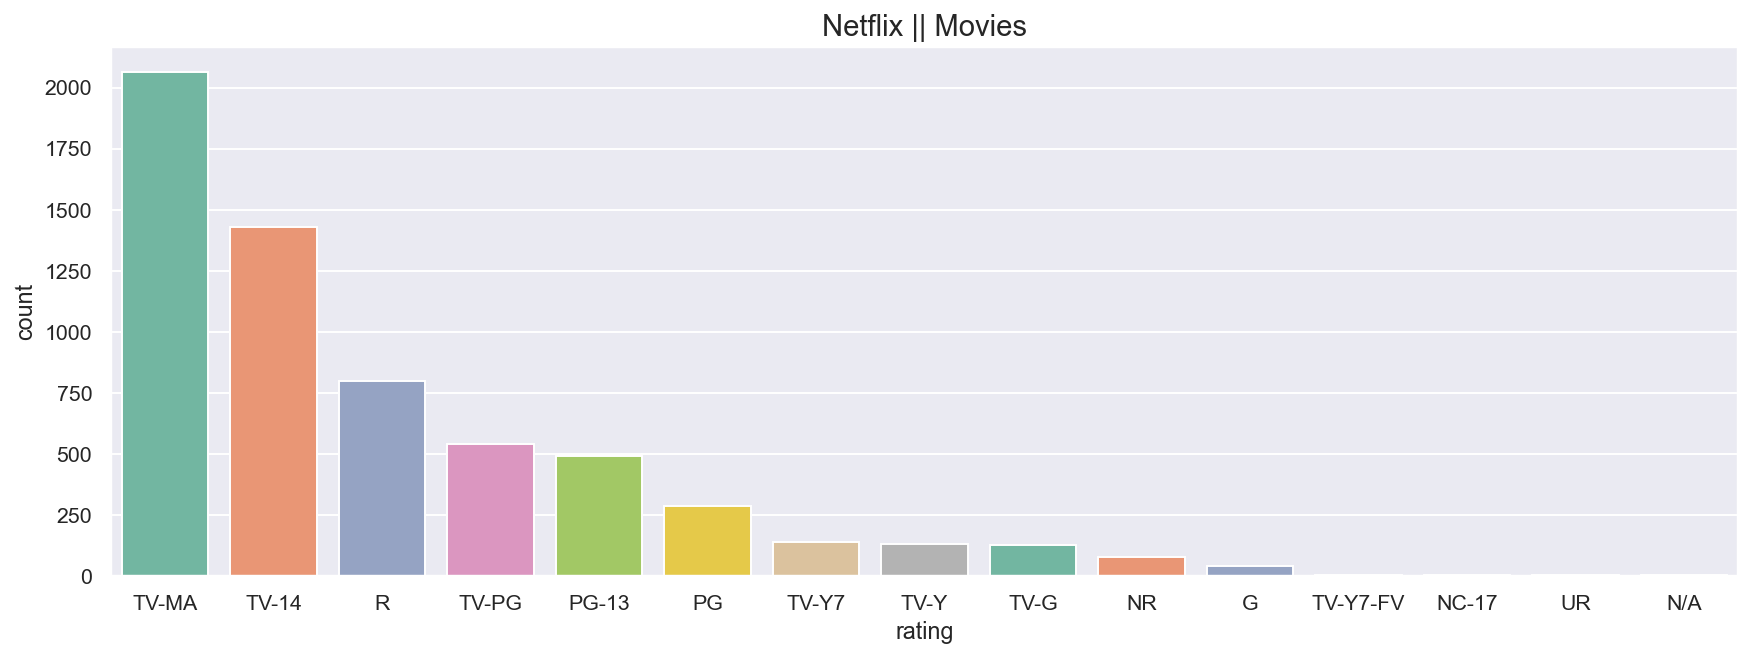

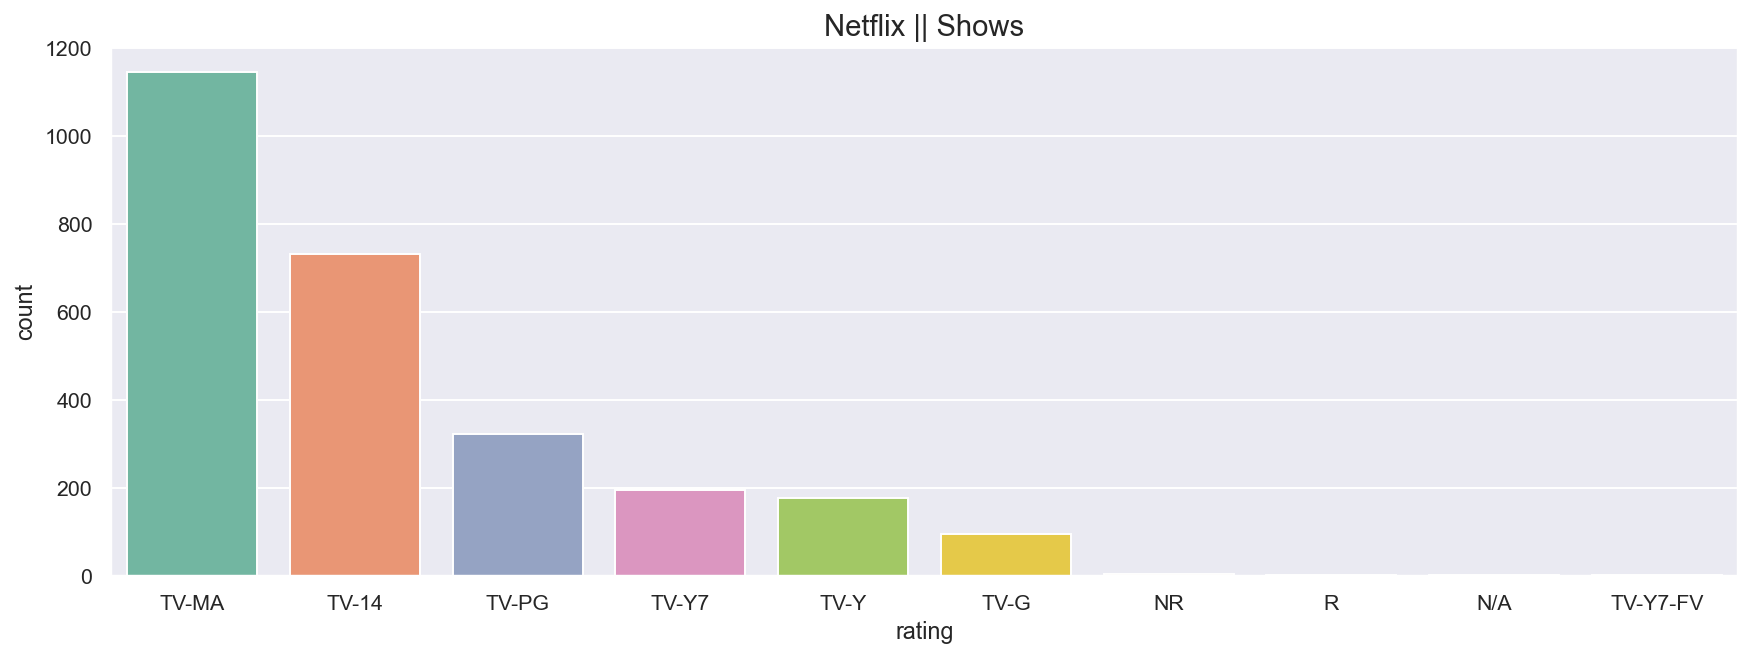

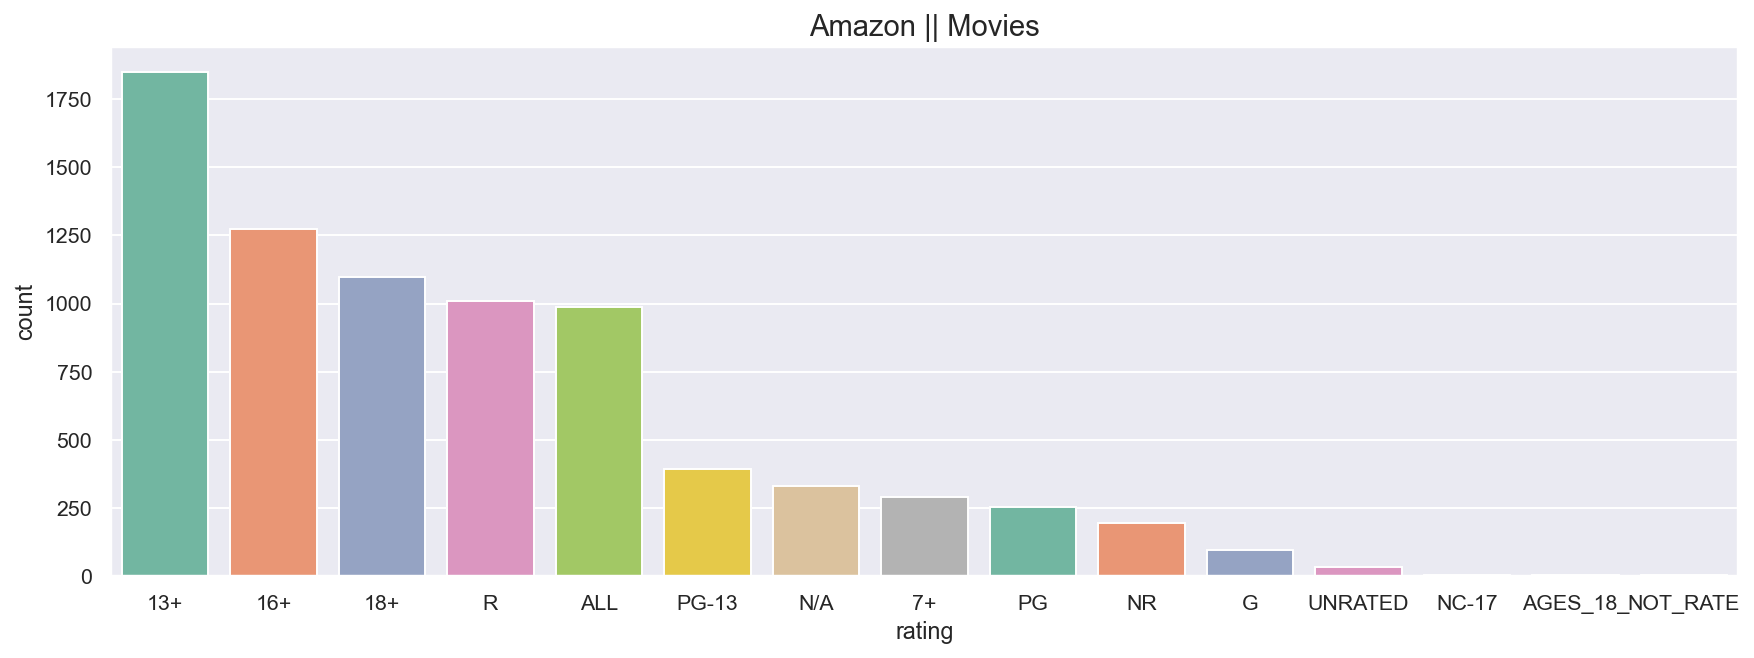

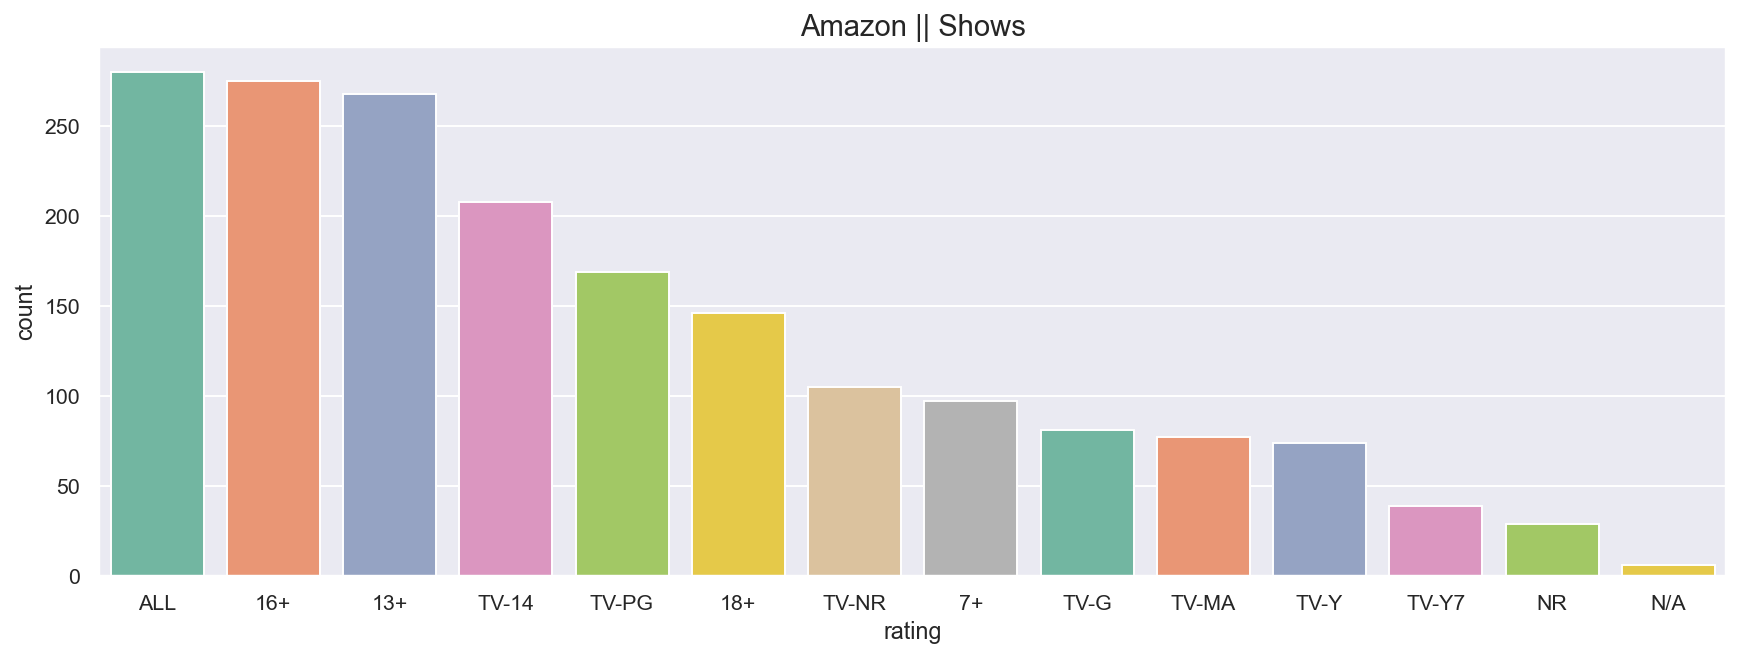

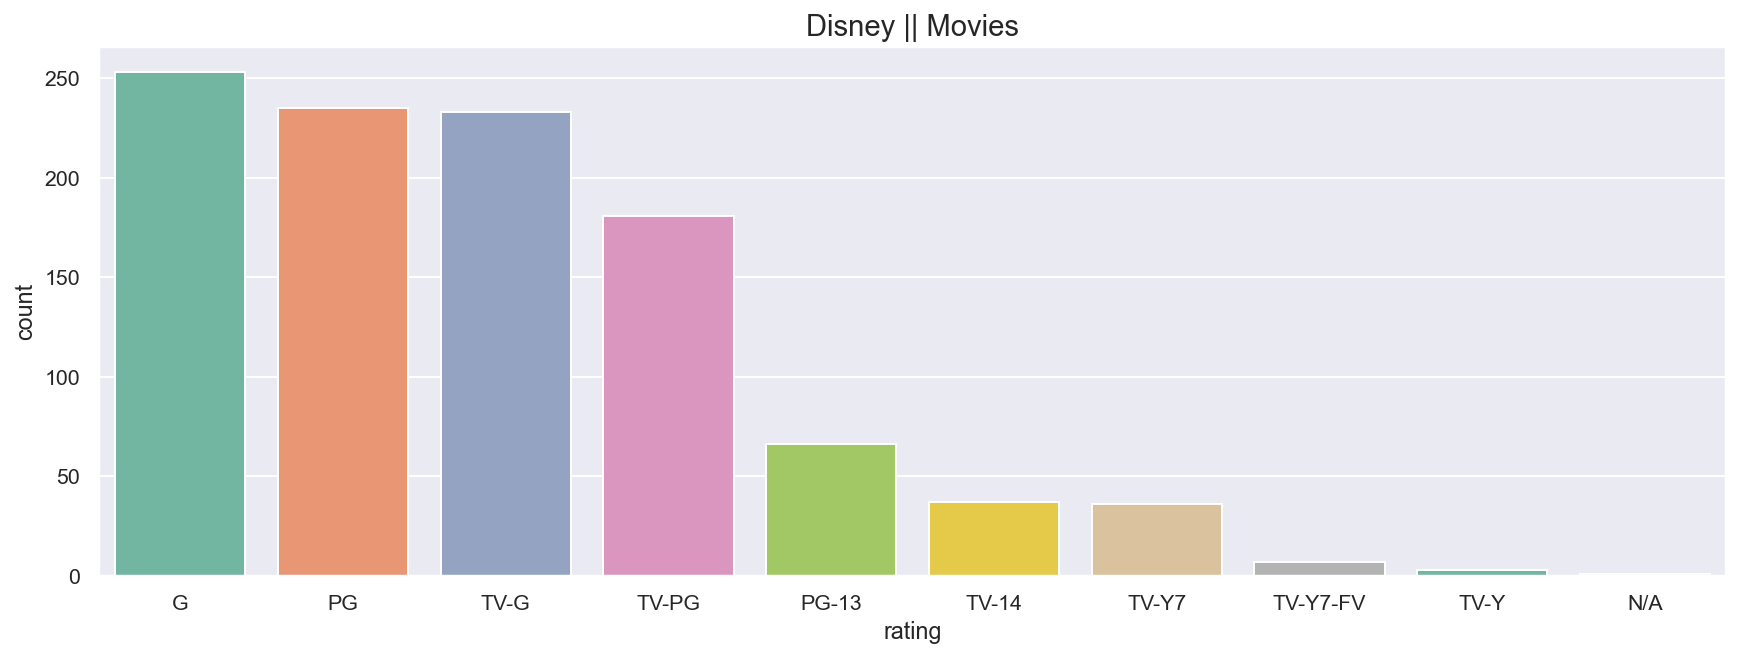

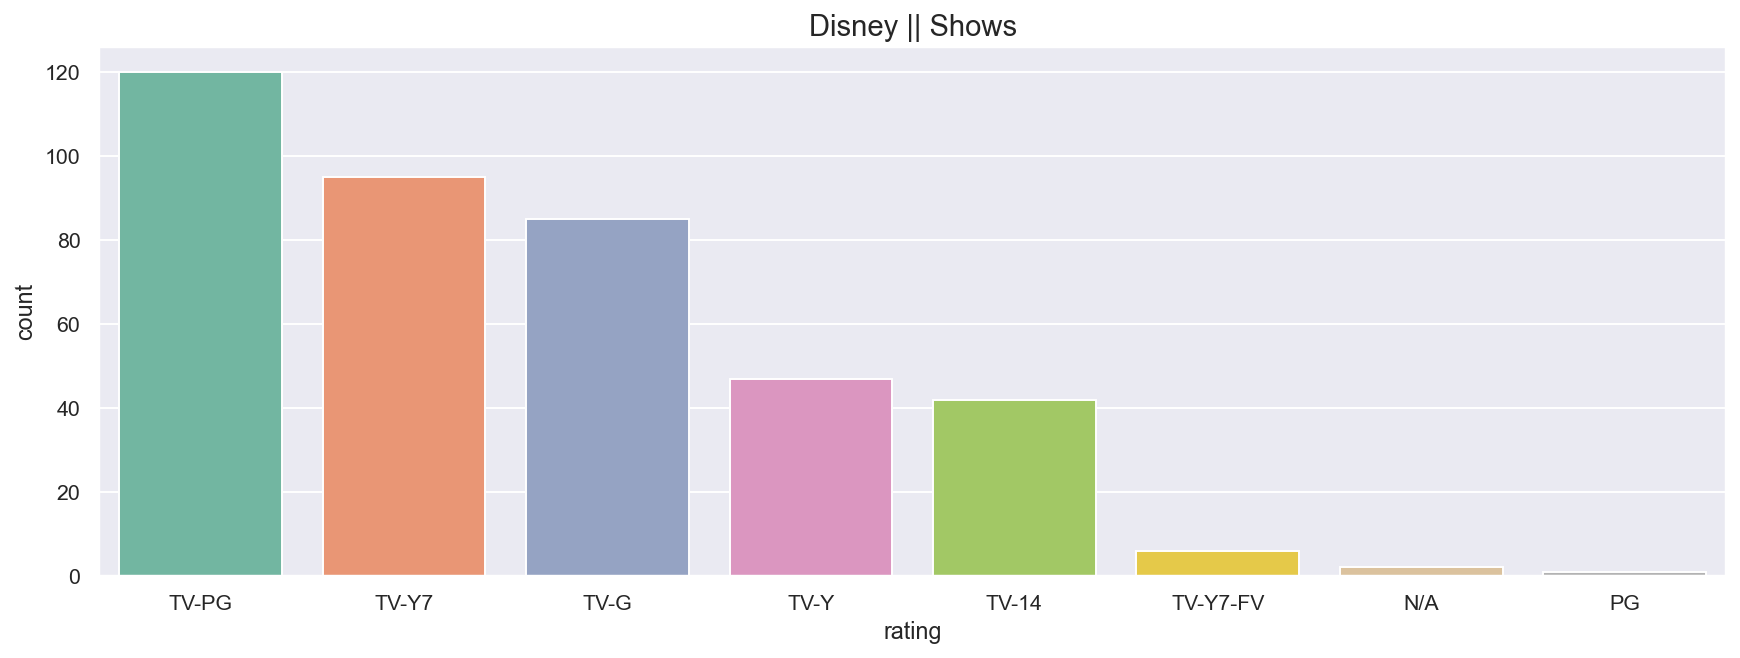

In [39]:
#NETFLIX
plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
plt.title('Netflix || Movies',size="15")
sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:15])
plt.show()

plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
plt.title('Netflix || Shows',size="15")
sns.countplot(x="rating", data=netflix_shows, palette="Set2", order=netflix_shows['rating'].value_counts().index[0:15])
plt.show()

#AMAZON
plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
plt.title('Amazon || Movies',size="15")
sns.countplot(x="rating", data=amazon_movies, palette="Set2", order=amazon_movies['rating'].value_counts().index[0:15])
plt.show()

plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
plt.title('Amazon || Shows',size="15")
sns.countplot(x="rating", data=amazon_shows, palette="Set2", order=amazon_shows['rating'].value_counts().index[0:15])
plt.show()

#DISNEY
plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
plt.title('Disney || Movies',size="15")
sns.countplot(x="rating", data=disney_movies, palette="Set2", order=disney_movies['rating'].value_counts().index[0:15])
plt.show()

plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
plt.title('Disney || Shows',size="15")
sns.countplot(x="rating", data=disney_shows, palette="Set2", order=disney_shows['rating'].value_counts().index[0:15])
plt.show()

### Year Wise Analysis

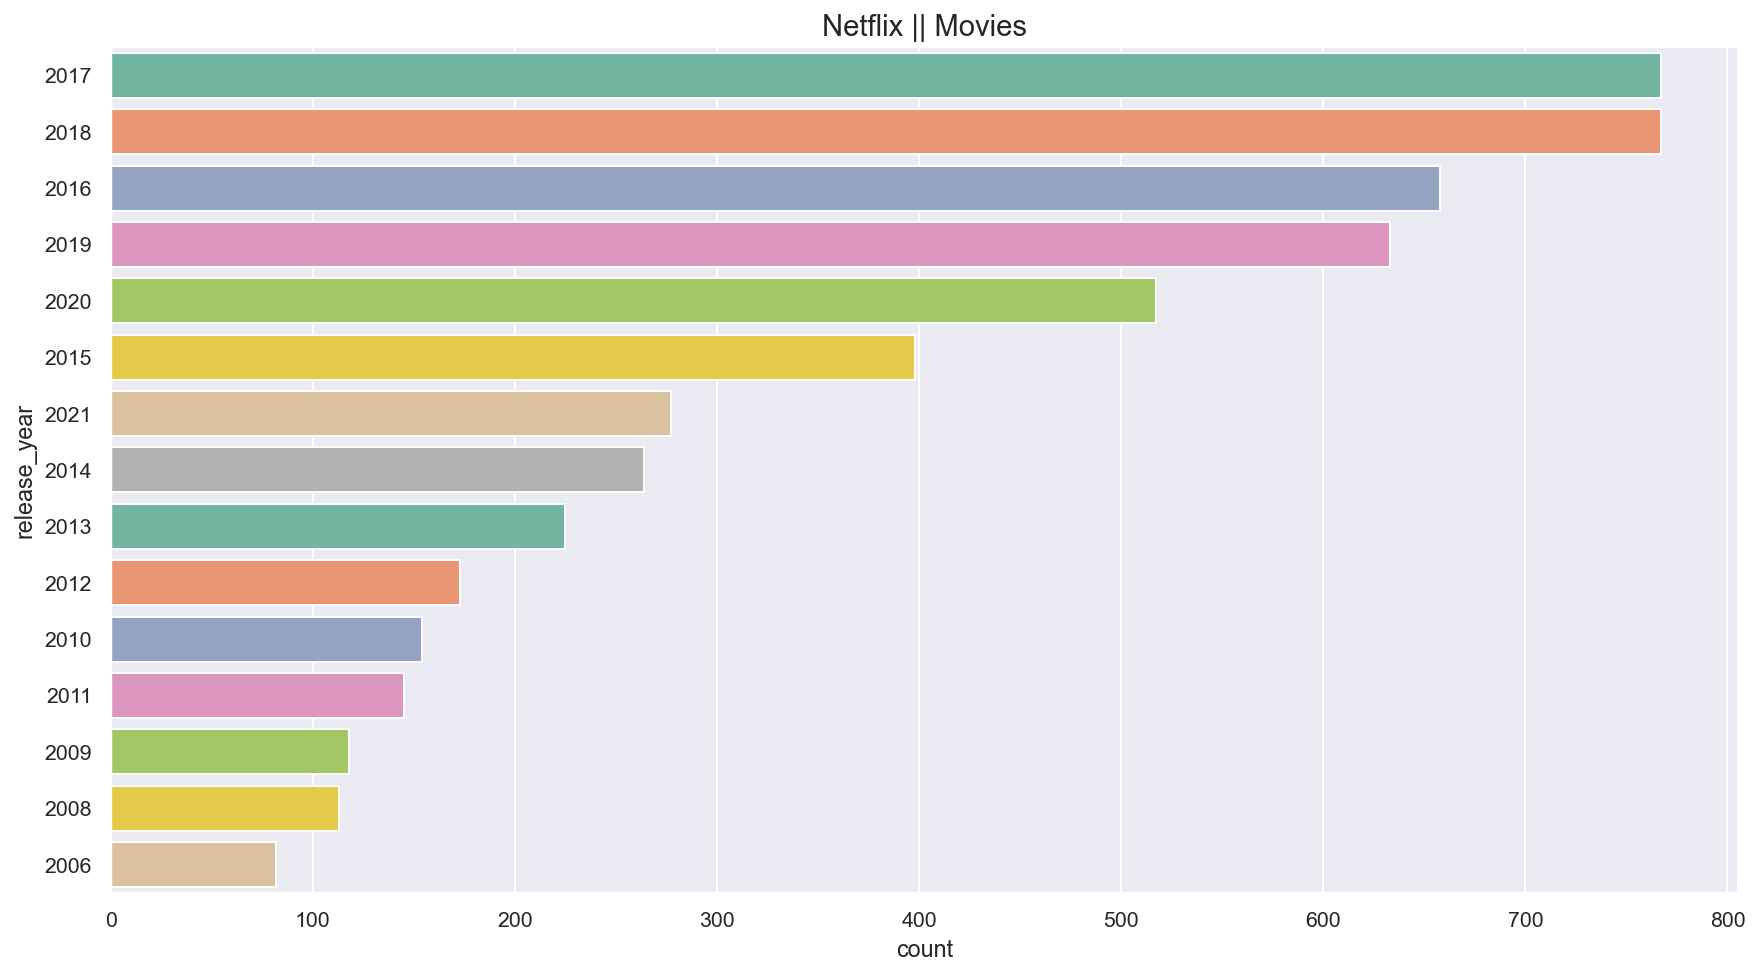

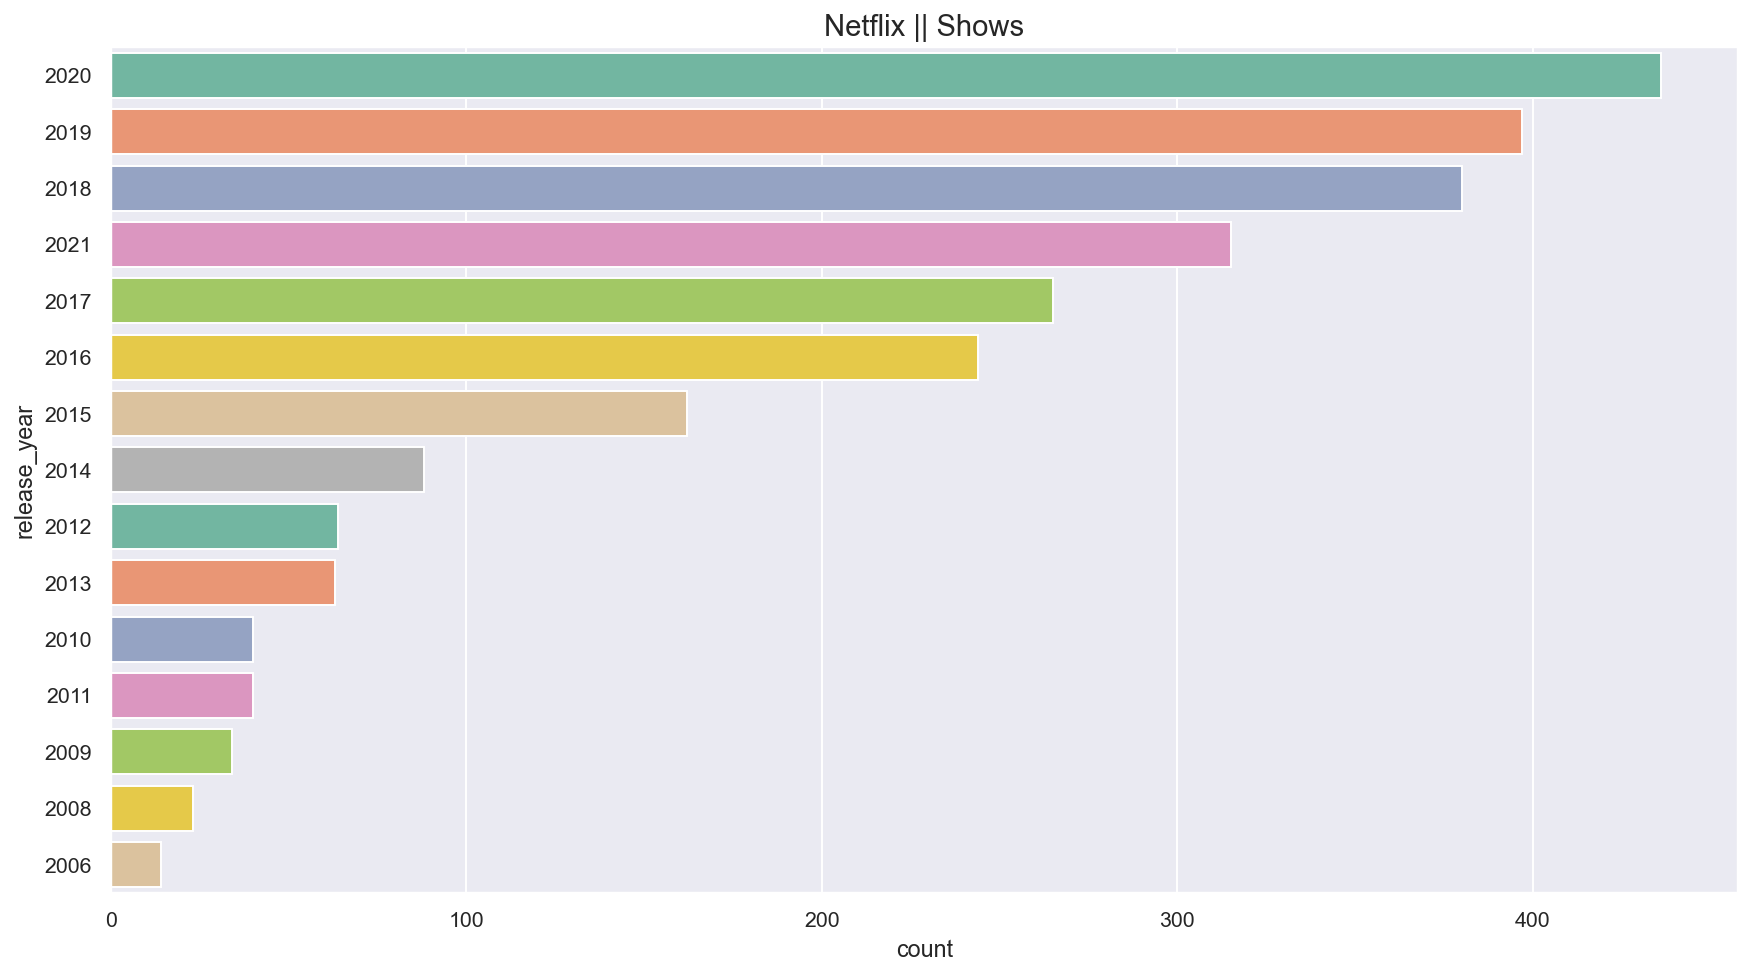

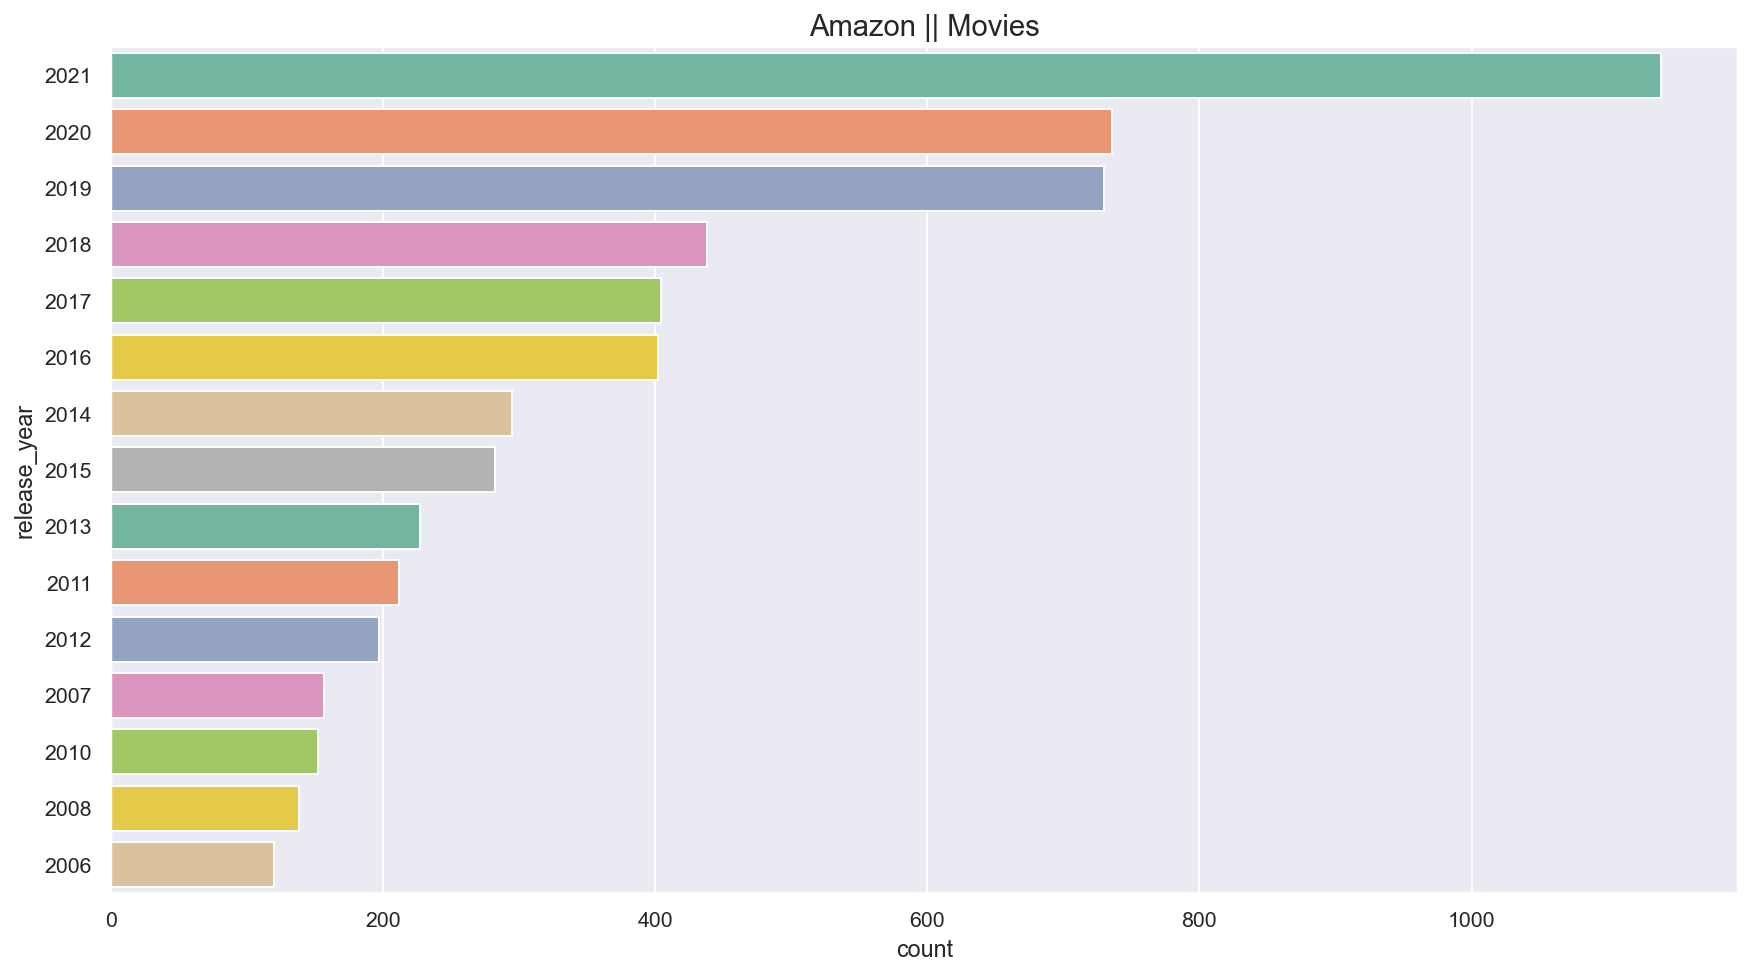

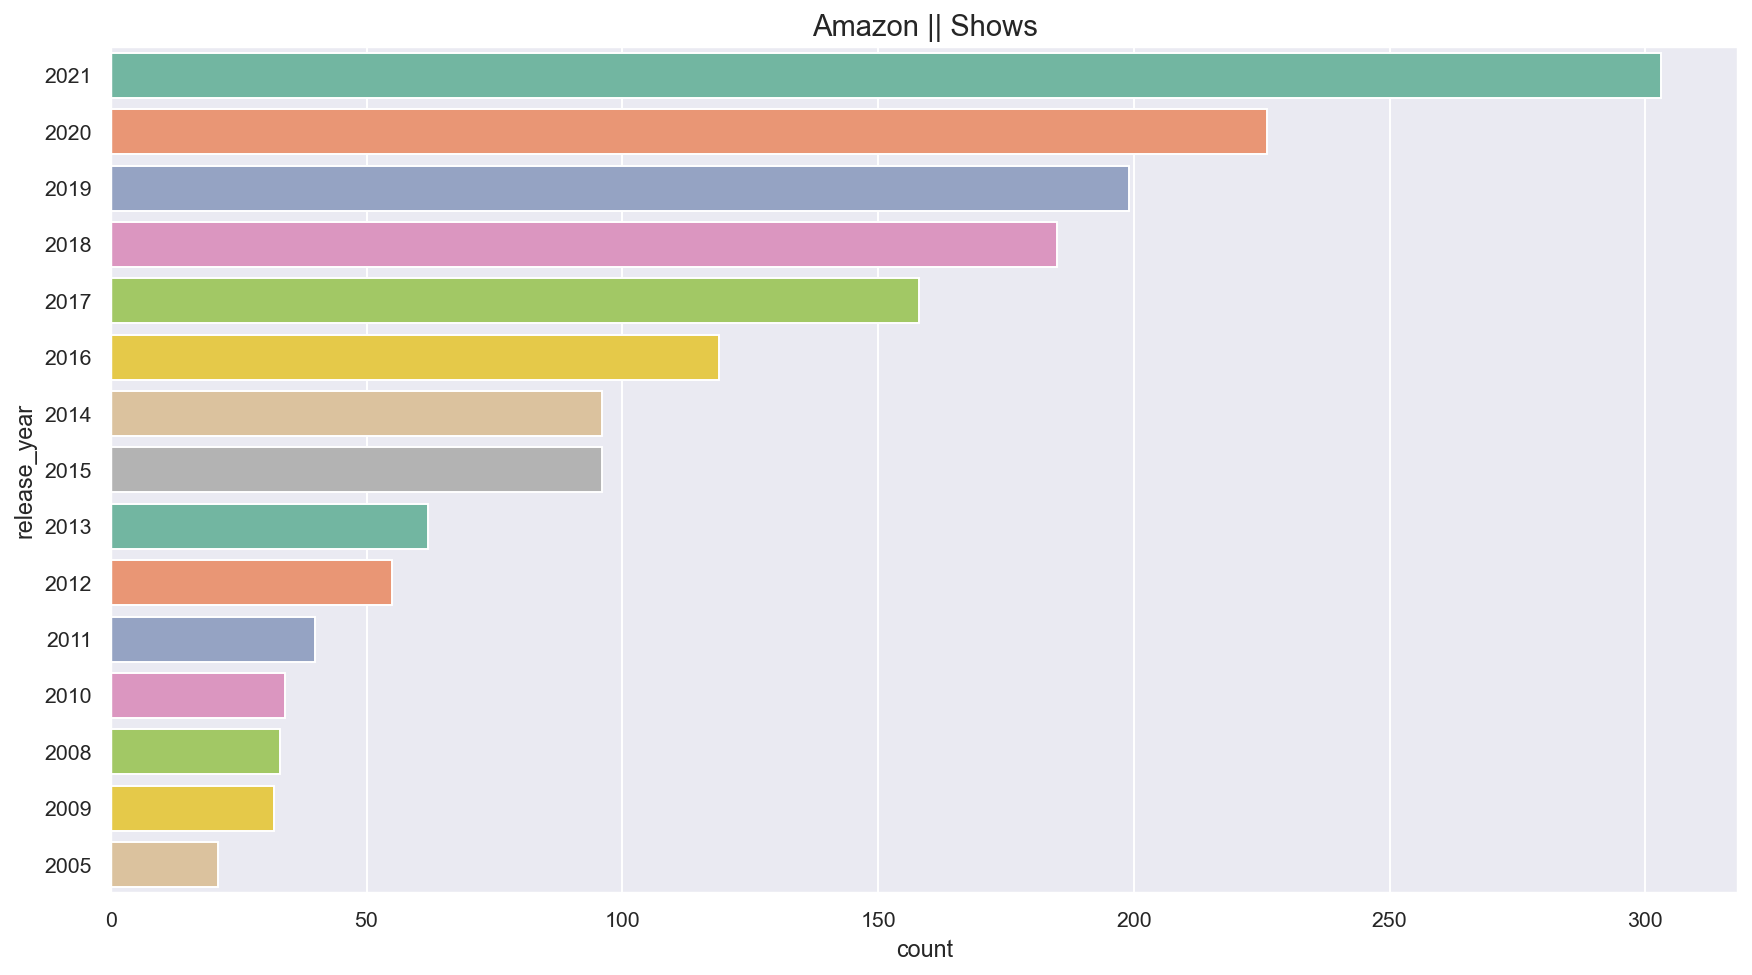

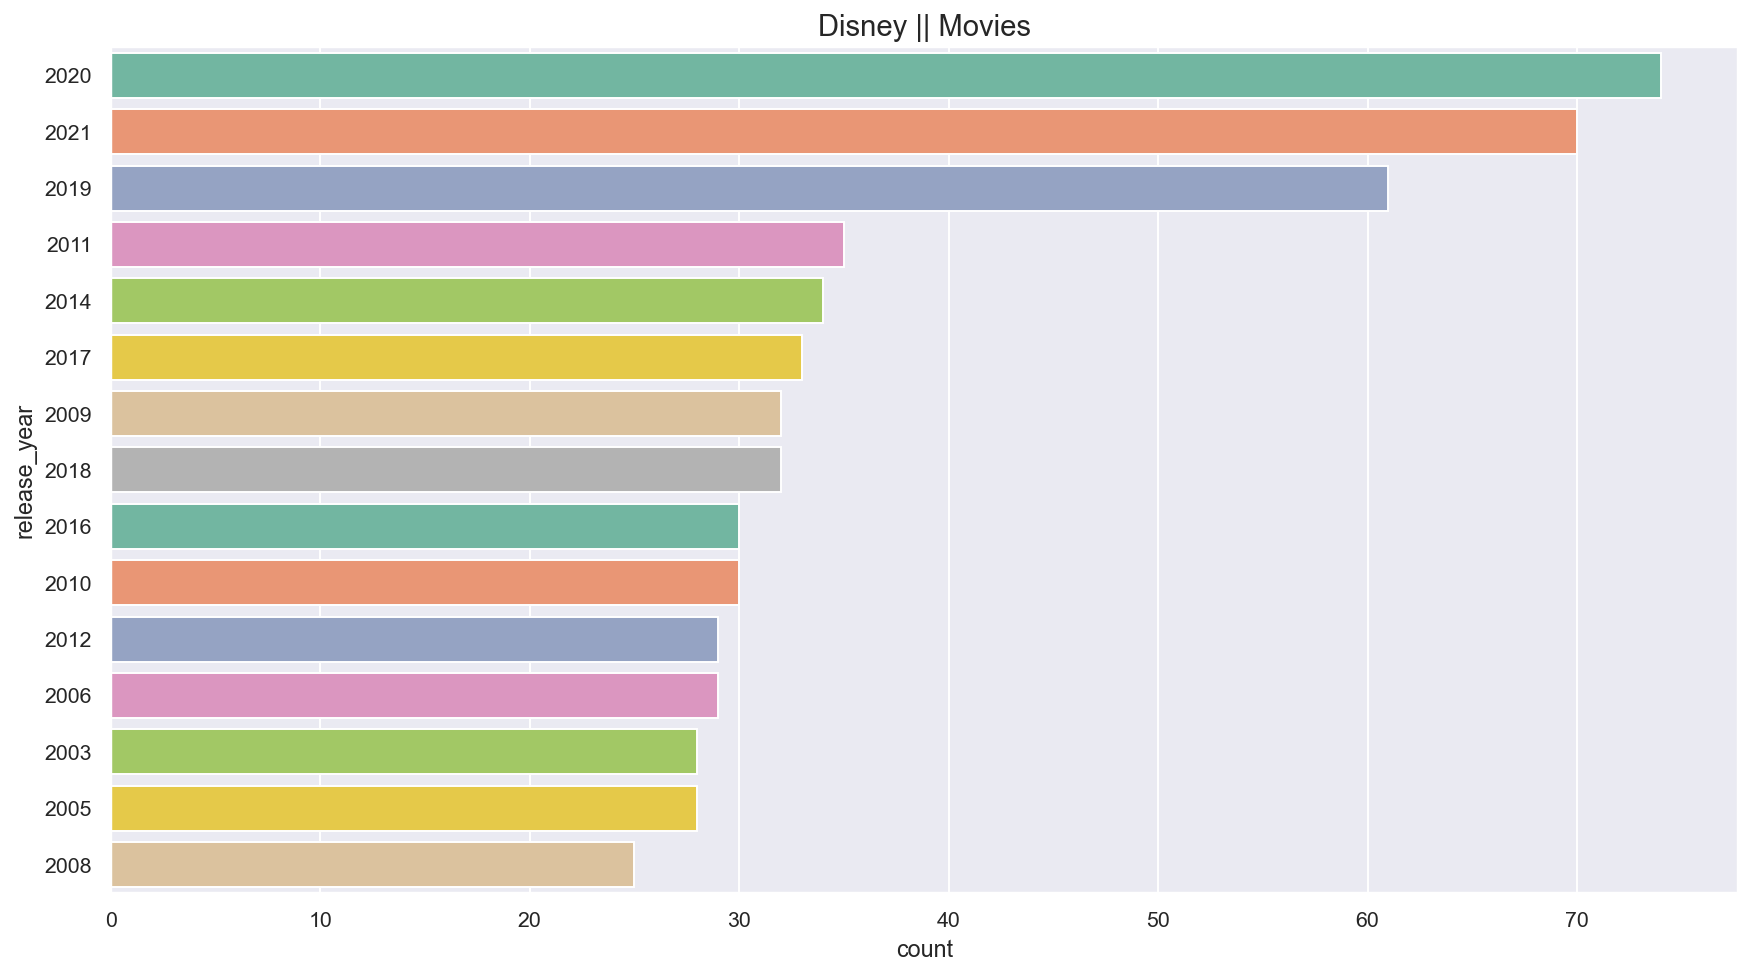

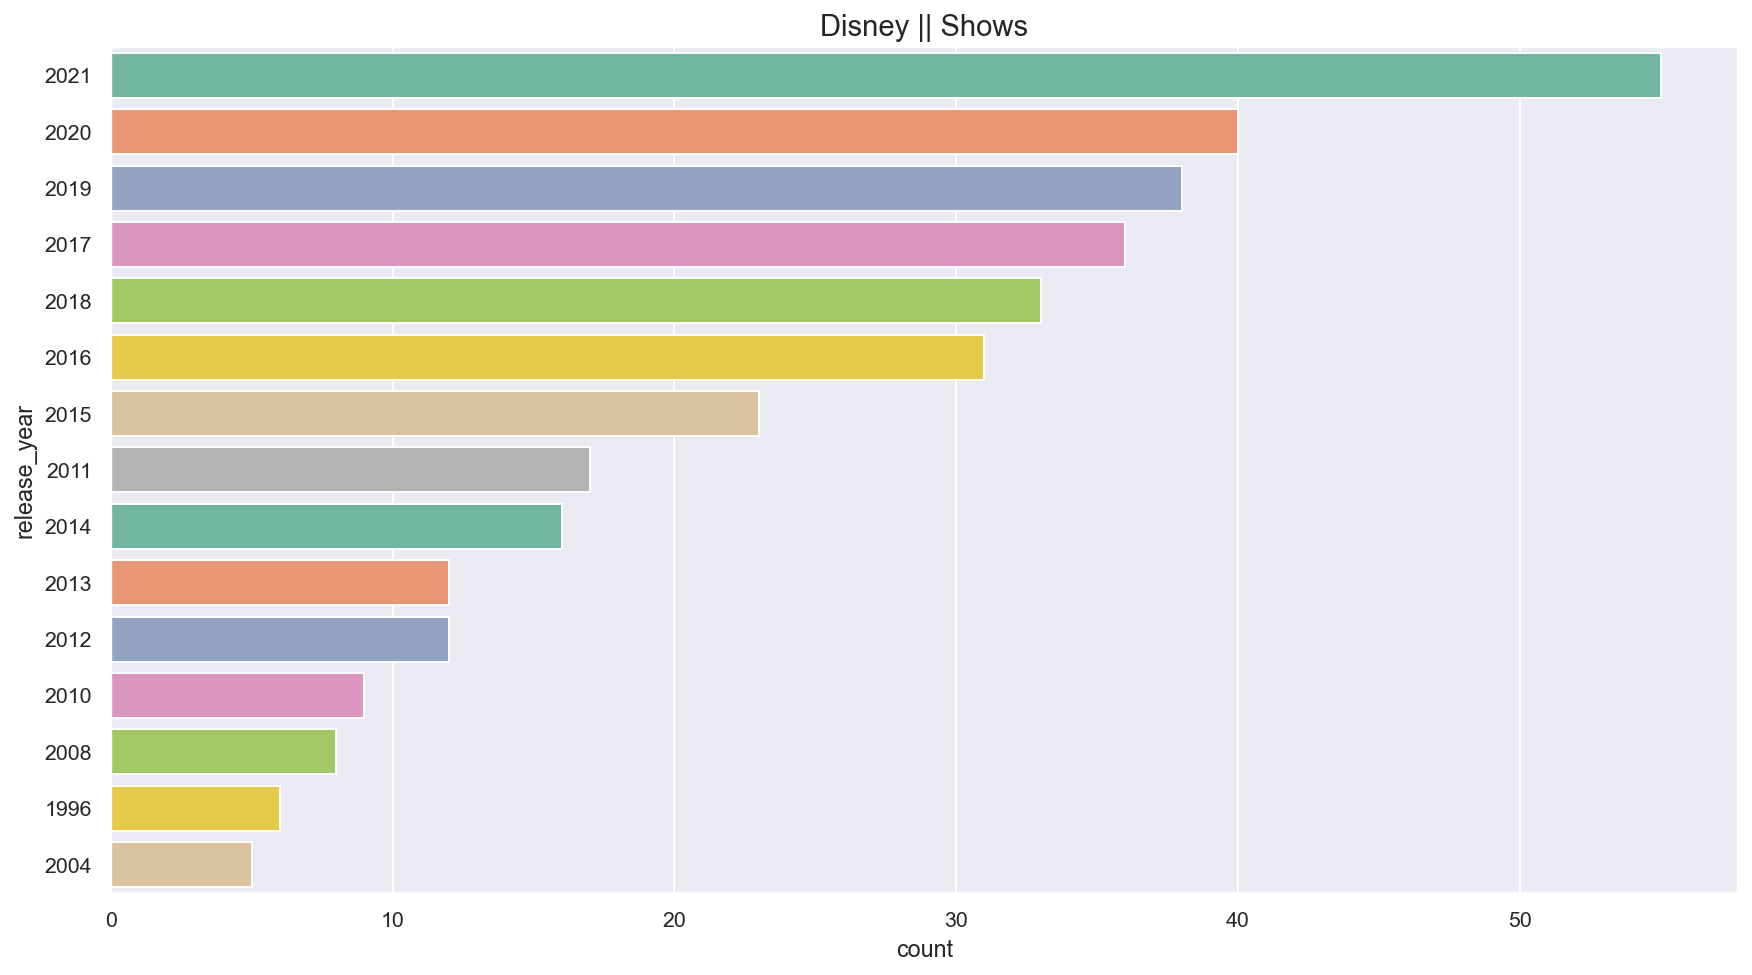

In [40]:
#NETFLIX
plt.figure(figsize=(15,8))
plt.title('Netflix || Movies',size="15")
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_movies, palette="Set2", order=netflix_movies['release_year'].value_counts().index[0:15])

plt.figure(figsize=(15,8))
plt.title('Netflix || Shows',size="15")
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_shows, palette="Set2", order=netflix_shows['release_year'].value_counts().index[0:15])

#AMAZON
plt.figure(figsize=(15,8))
plt.title('Amazon || Movies',size="15")
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=amazon_movies, palette="Set2", order=amazon_movies['release_year'].value_counts().index[0:15])

plt.figure(figsize=(15,8))
plt.title('Amazon || Shows',size="15")
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=amazon_shows, palette="Set2", order=amazon_shows['release_year'].value_counts().index[0:15])


#DISNEY
plt.figure(figsize=(15,8))
plt.title('Disney || Movies',size="15")
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=disney_movies, palette="Set2", order=disney_movies['release_year'].value_counts().index[0:15])

plt.figure(figsize=(15,8))
plt.title('Disney || Shows',size="15")
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=disney_shows, palette="Set2", order=disney_shows['release_year'].value_counts().index[0:15])

## Top 10 Content Creating Country's 

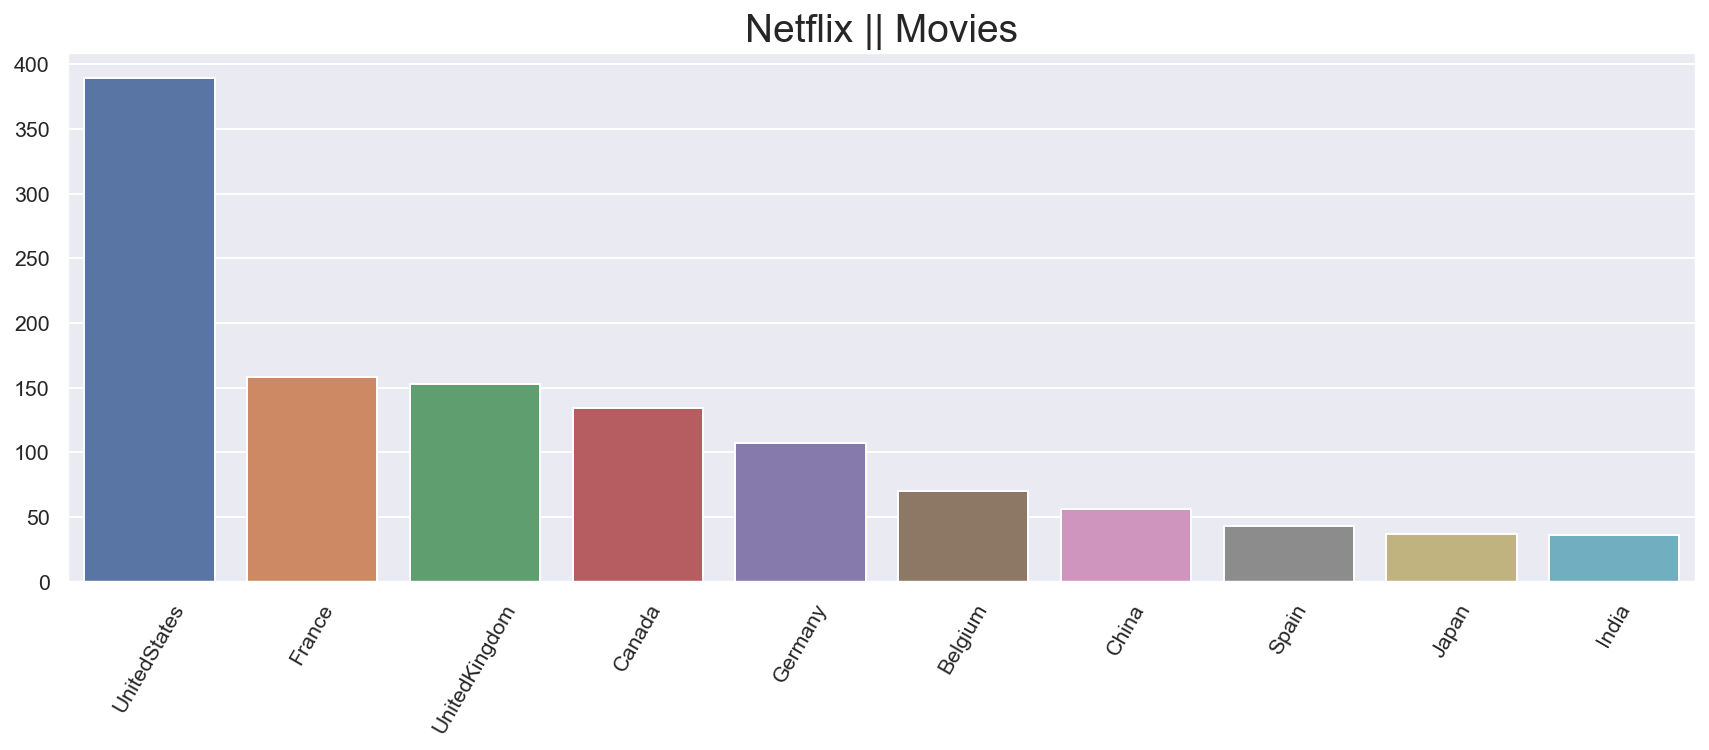

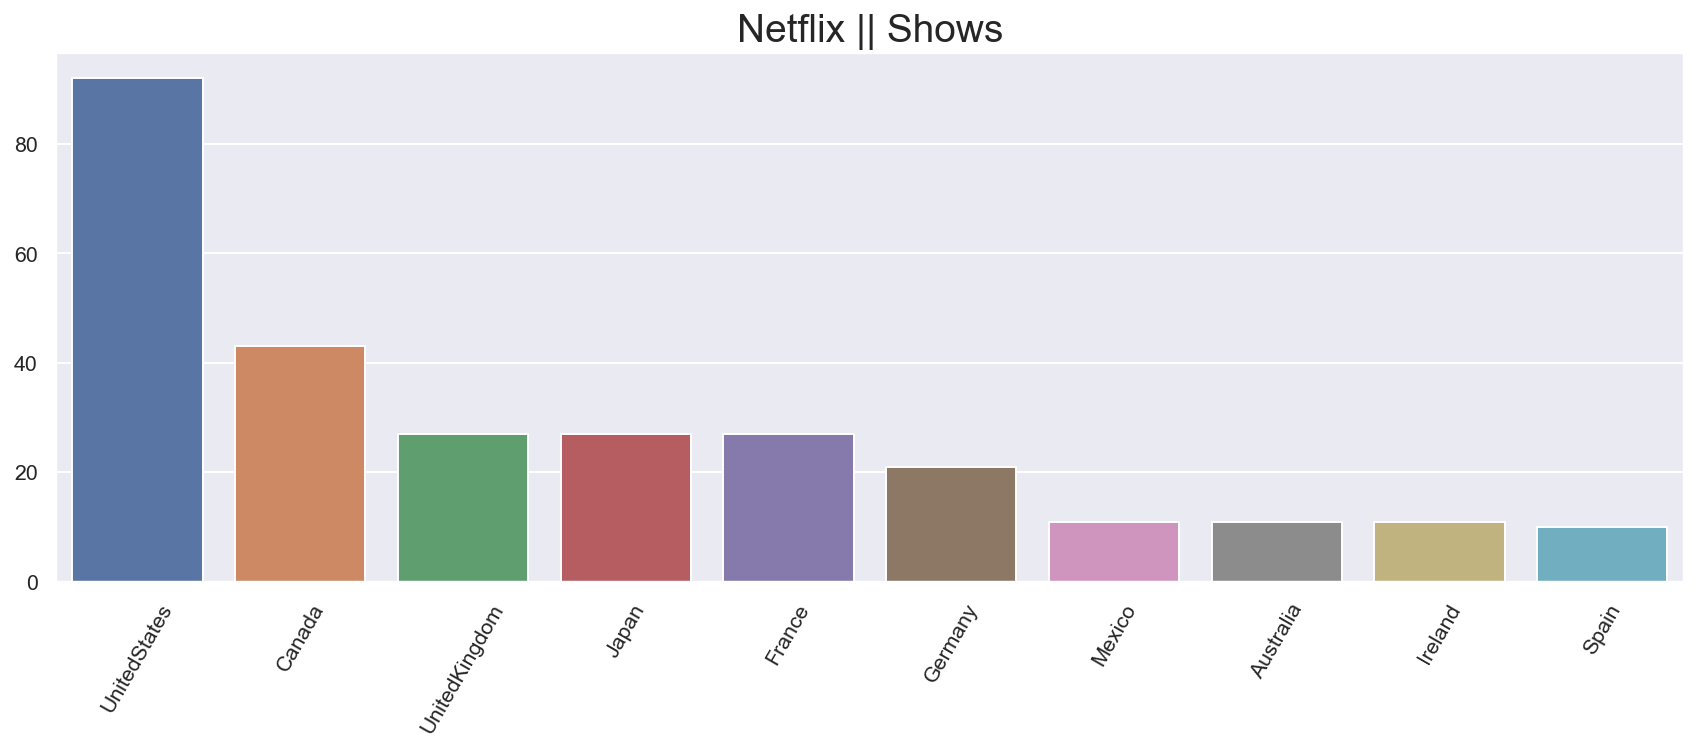

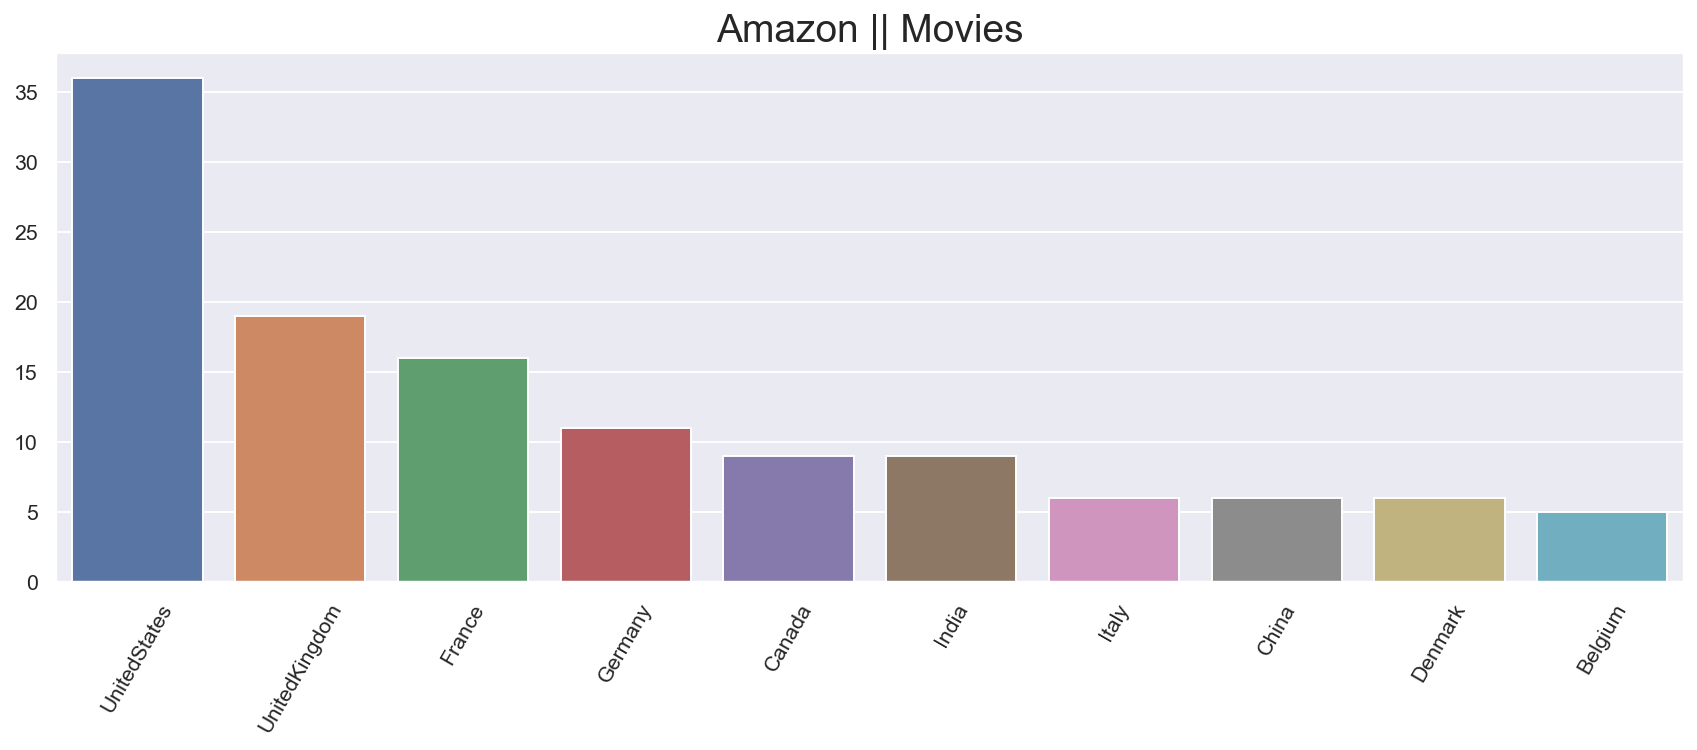

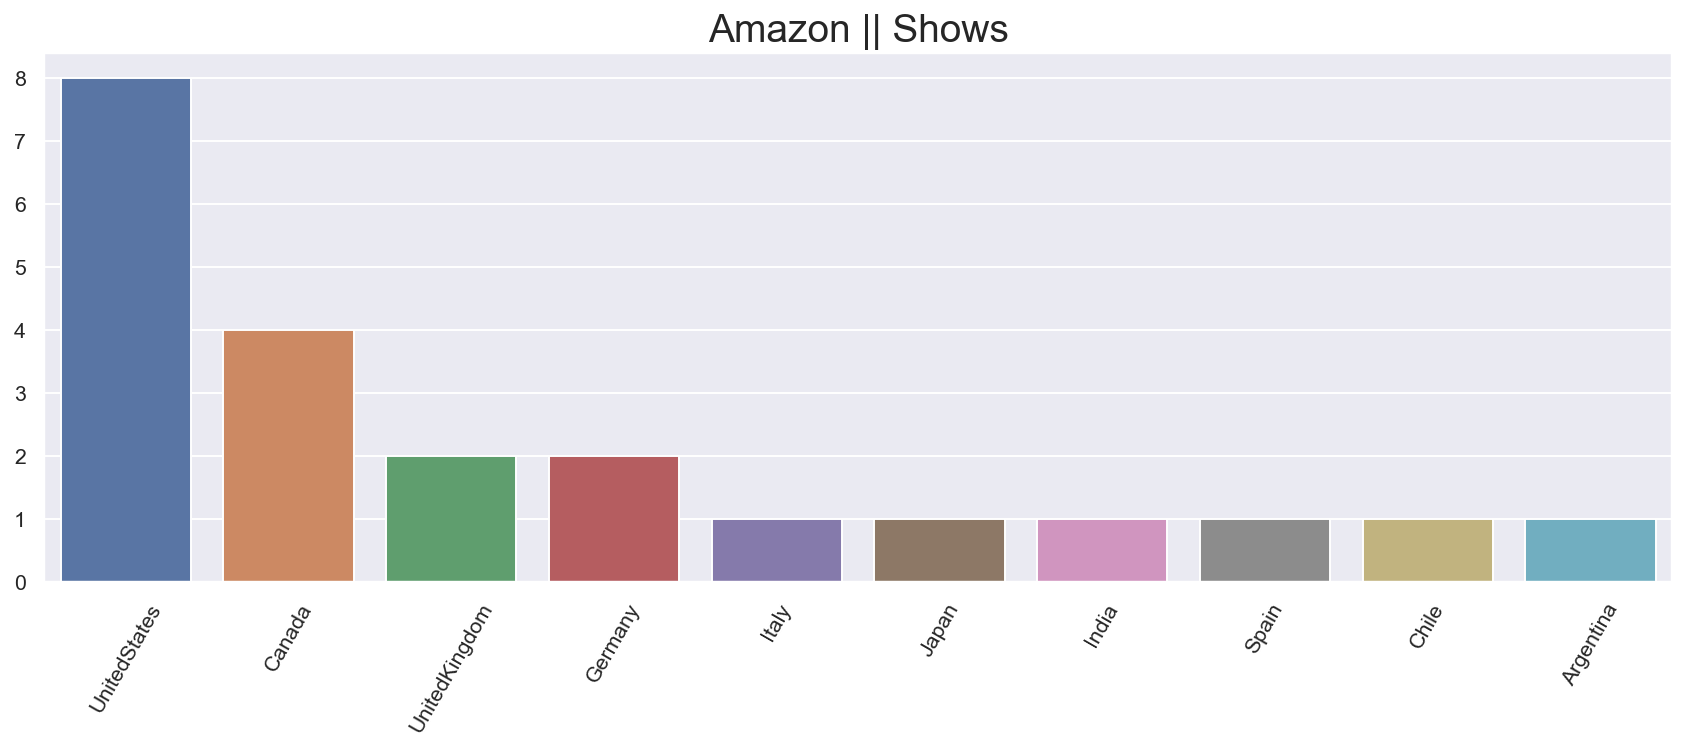

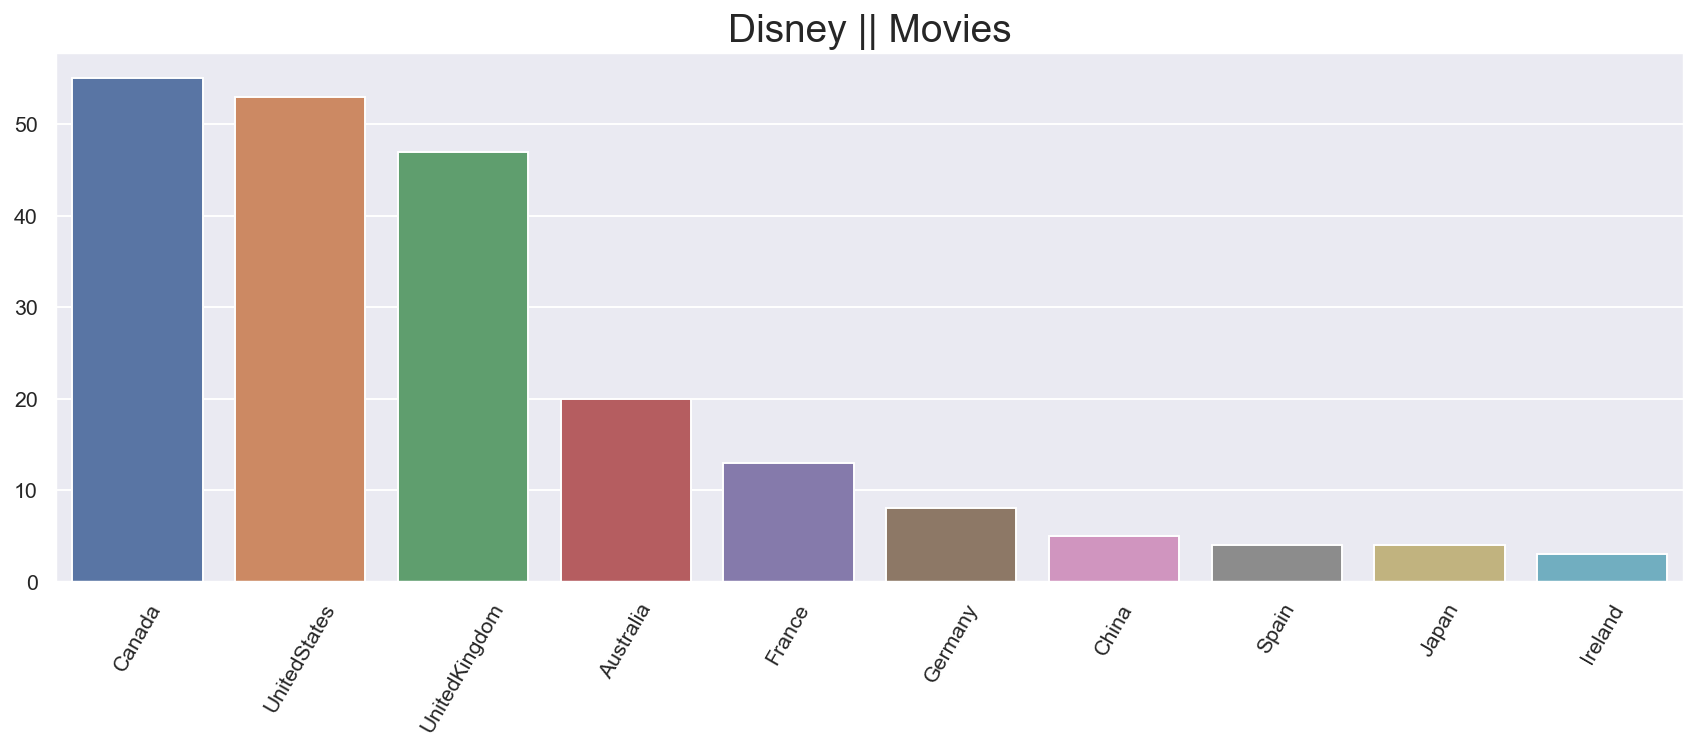

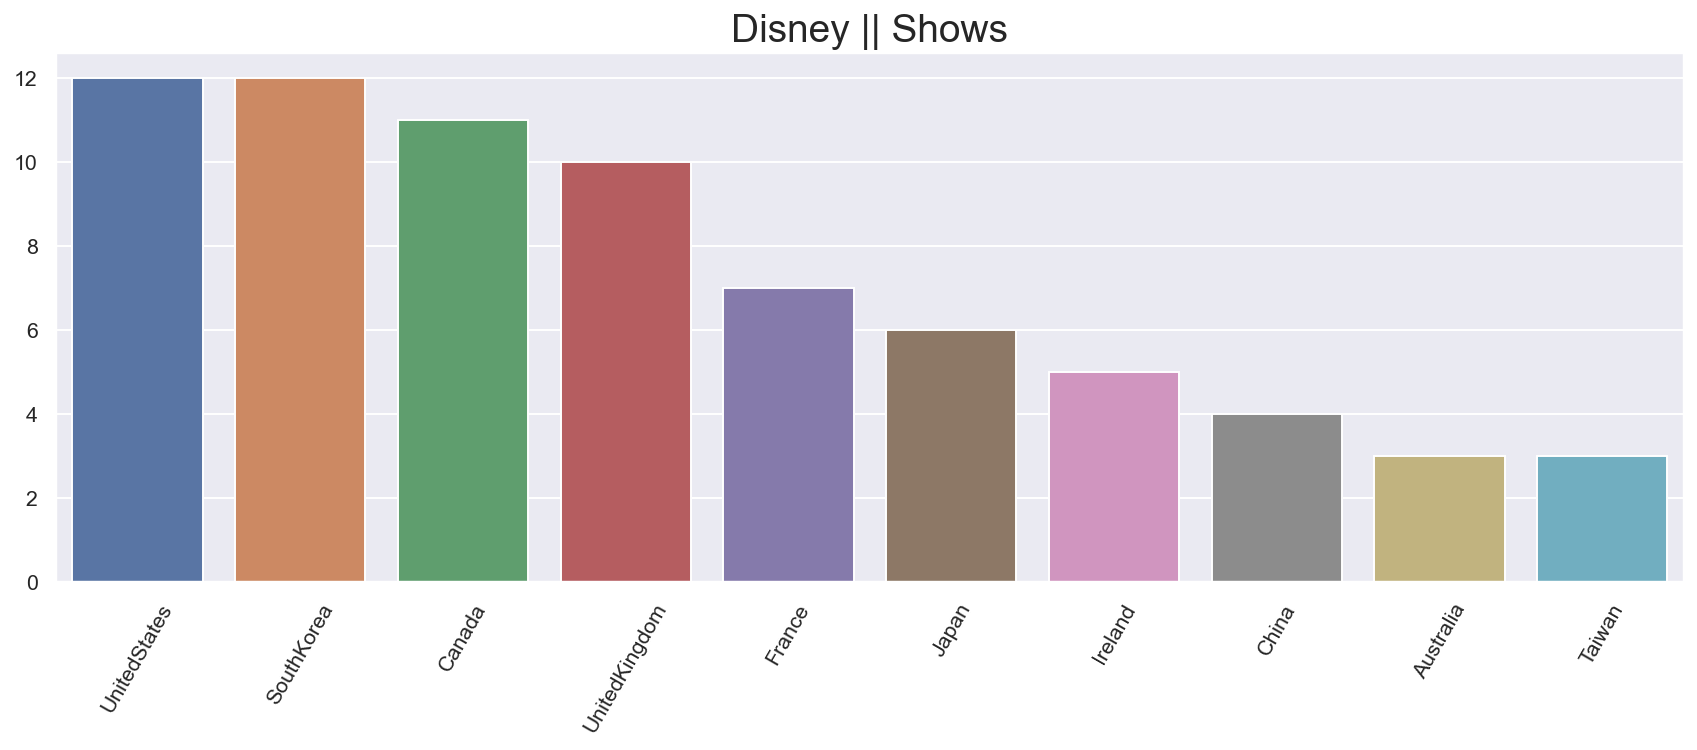

In [41]:
#NETFLIX

countries={}
netflix_movies['country']=netflix_movies['country'].fillna('Unknown')
cou=list(netflix_movies['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no      
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

#Viz
plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
plt.title('Netflix || Movies',size="20")
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 60)
plt.show()

countries={}
netflix_shows['country']=netflix_shows['country'].fillna('Unknown')
cou=list(netflix_shows['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

#Viz
plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
plt.title('Netflix || Shows',size="20")
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 60)
plt.show()


#AMAZON
countries={}
amazon_movies['country']=amazon_movies['country'].fillna('Unknown')
cou=list(amazon_movies['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no      
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

#Viz
plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
plt.title('Amazon || Movies',size="20")
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 60)
plt.show()

countries={}
amazon_shows['country']=amazon_shows['country'].fillna('Unknown')
cou=list(amazon_shows['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

#Viz
plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
plt.title('Amazon || Shows',size="20")
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 60)
plt.show()

#DISNEY
countries={}
disney_movies['country']=disney_movies['country'].fillna('Unknown')
cou=list(disney_movies['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no      
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

#Viz
plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
plt.title('Disney || Movies',size="20")
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 60)
plt.show()

countries={}
disney_shows['country']=disney_shows['country'].fillna('Unknown')
cou=list(disney_shows['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

#Viz
plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
plt.title('Disney || Shows',size="20")
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 60)
plt.show()

## Content BY Target Ages

### Amazon

In [42]:
ratings_ages = {
    '13+': 'Older Kids',
    '18+': 'Early Adulthood',
    '7+': 'Kids',
    '16+': 'Adults',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'TV-Y7': 'Older Kids',
    'NR': 'Adults',
    'TV-PG': 'Older Kids',
    'TV-14': 'Teens',
    'TV-G' : 'Kids',
    'PG-13' : 'Teens',
    'TV-MA' : 'Adults',
    'G' : 'Kids',
    'PG' : 'Older Kids',
    'NC-17' : 'Adults'}

# Feature Eng.
amazon['count'] = 1
amazon['first_country'] = amazon['country'].apply(lambda x: x.split(",")[0])
amazon['first_country'].head()
amazon['target_ages'] = amazon['rating'].replace(ratings_ages)
amazon['target_ages'].unique()

amazon['first_country'].head()

0            Canada
1             India
2     United States
3     United States
4    United Kingdom
Name: first_country, dtype: object

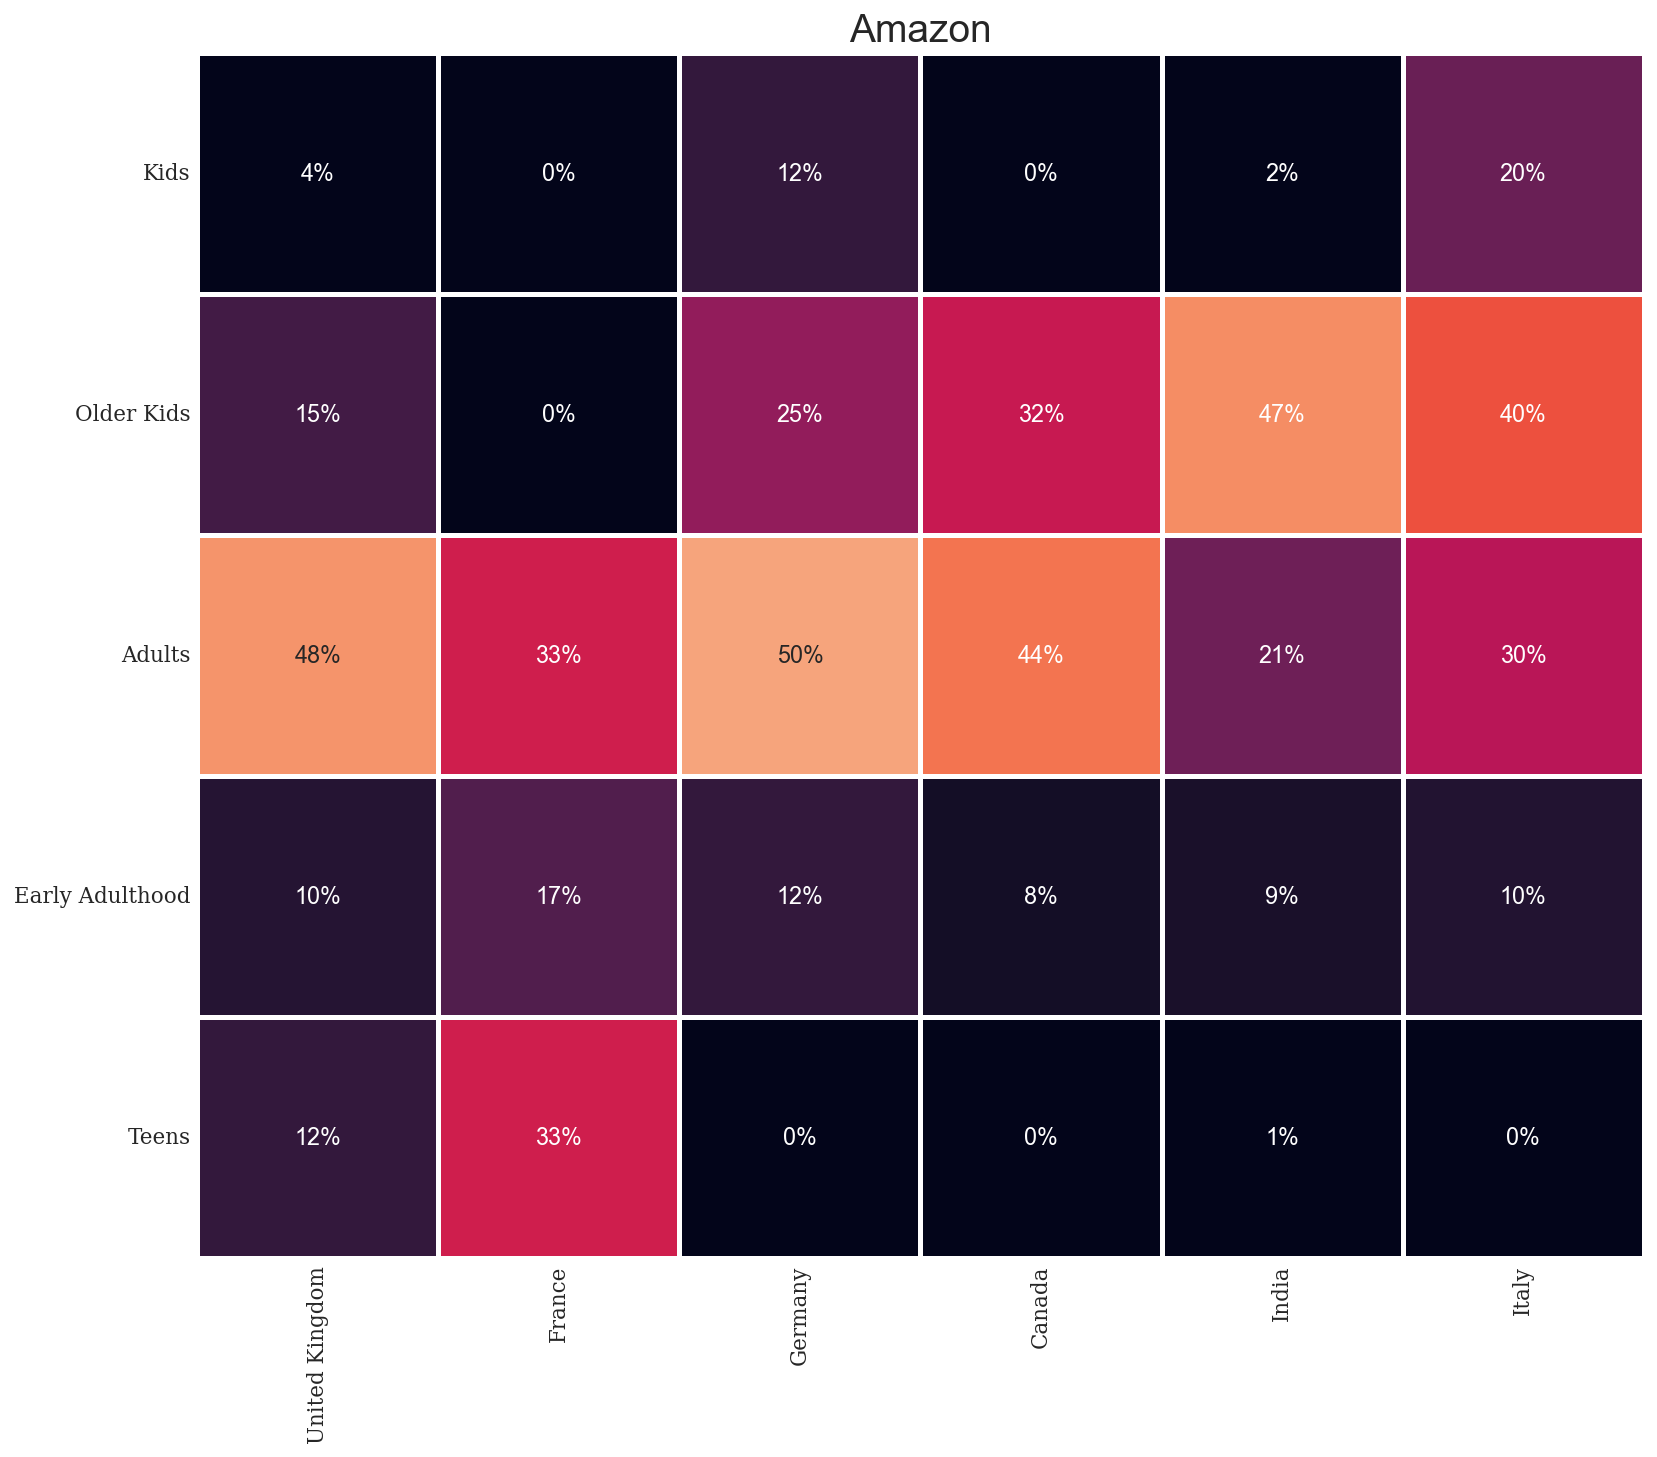

In [43]:
data = amazon.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['first_country']

amazon_heatmap = amazon.loc[amazon['first_country'].isin(data)]

#Viz
amazon_heatmap = pd.crosstab(amazon_heatmap['first_country'],amazon_heatmap['target_ages'],normalize = "index").T
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order = ['United Kingdom', 'France', 'Germany', 'Canada', 'India', 'Italy']

age_order = ['Kids','Older Kids','Adults','Early Adulthood','Teens']

sns.heatmap(amazon_heatmap.loc[age_order,country_order],square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.title('Amazon',size="20")

ax.spines['top'].set_visible(True)


ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

### netflix

In [44]:
netflix_movies['rating'].unique().tolist()

country = {'United State',
          'France',
          'United Kingdom',
          'Germany',
          'Canada',
          'Belgium',
          'China',
          'Spain',
          'Japan',
          'India'}

ratings_ages = {'R': 'Adults',
    'TV-Y': 'Kids',
    'TV-Y7': 'Older Kids',
    'NR': 'Adults',
    'TV-PG': 'Older Kids',
    'TV-14': 'Teens',
    'TV-G' : 'Kids',
    'PG-13' : 'Teens',
    'TV-MA' : 'Adults',
    'G' : 'Kids',
    'PG' : 'Older Kids',
    'NC-17' : 'Adults',
    'TV-14' : 'Teens',
    'NR' : 'Adults'}

In [45]:
# Feature Eng.
netflix_movies['count'] = 1
netflix_movies['first_country'] = netflix_movies['country'].apply(lambda x: x.split(",")[0])
netflix_movies['first_country'].head()
netflix_movies['target_ages'] = netflix_movies['rating'].replace(ratings_ages)
netflix_movies['target_ages'].unique()

netflix_movies['first_country'].head()
netflix_movies['target_ages'].unique()

array(['Teens', 'Older Kids', 'Adults', 'Kids', '74 min', '84 min',
       '66 min', 'N/A', 'TV-Y7-FV', 'UR'], dtype=object)

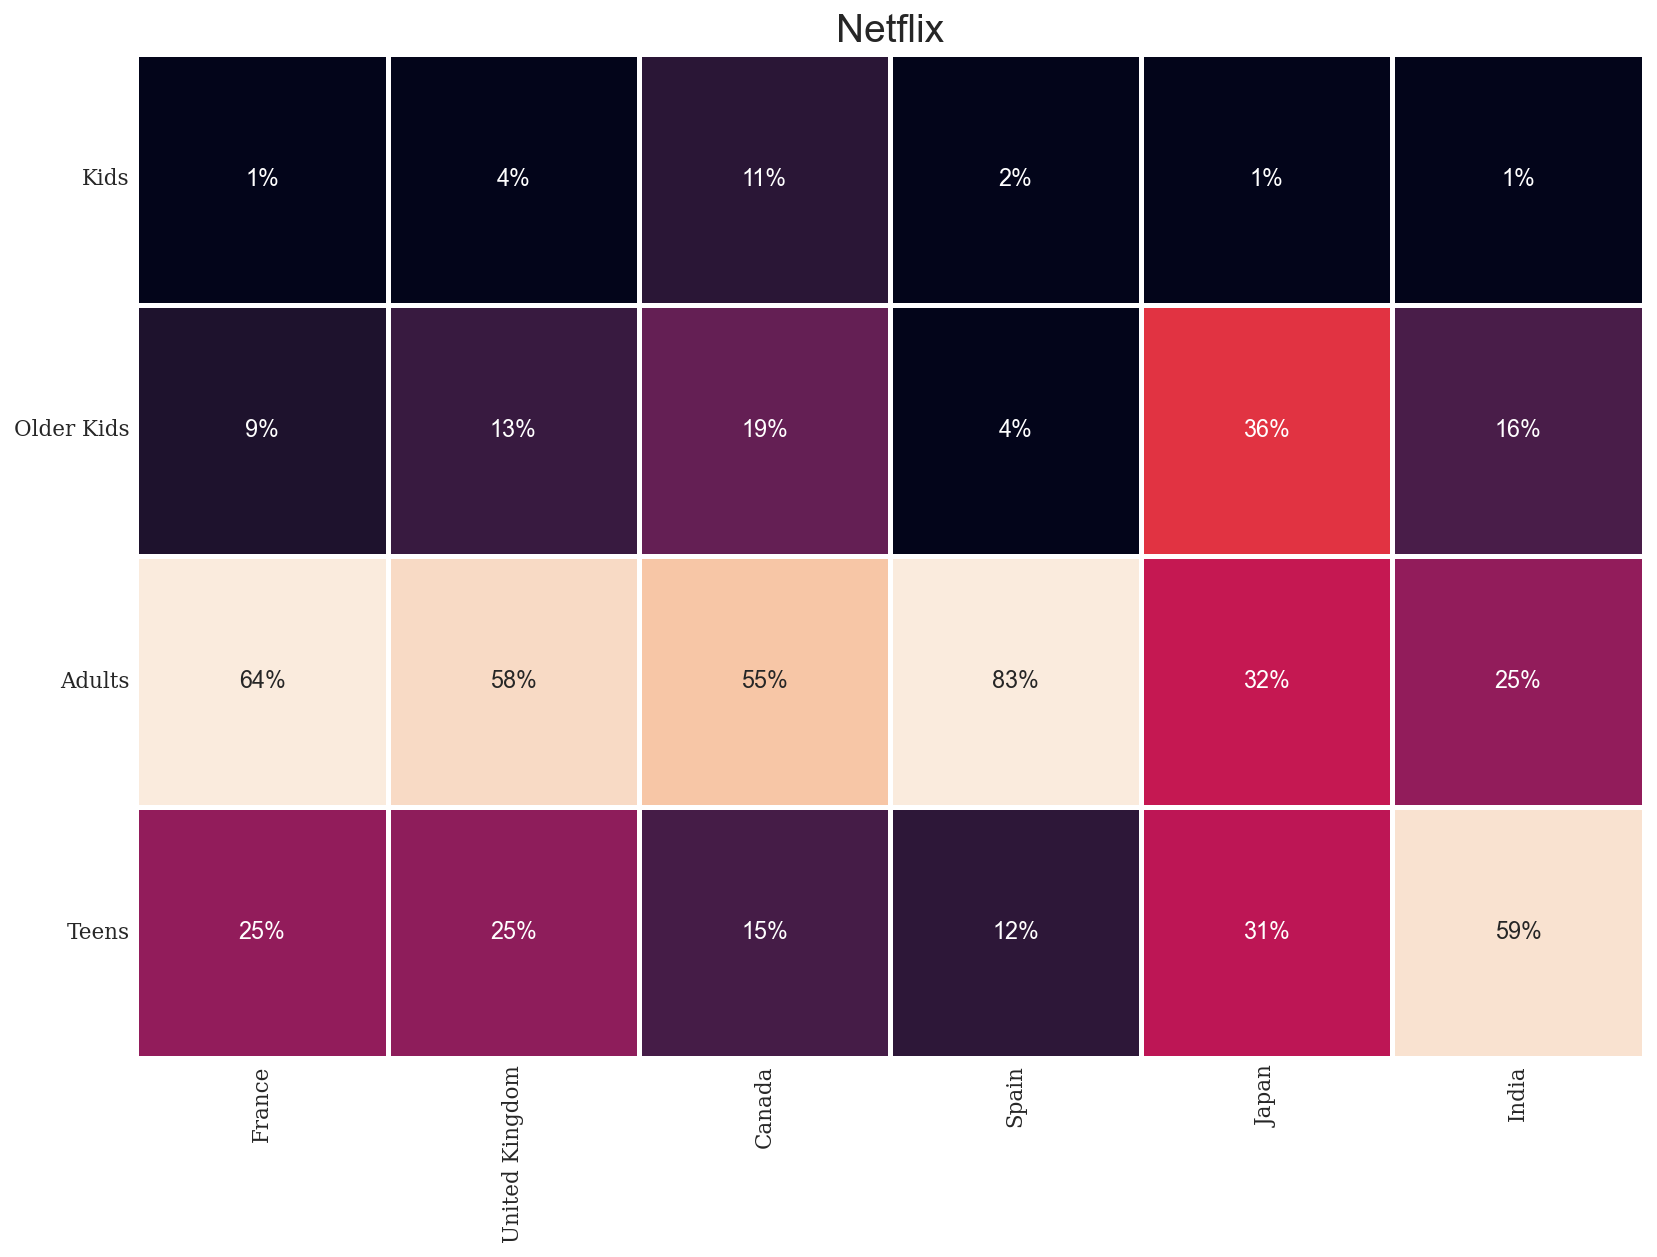

In [46]:
data = netflix_movies.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['first_country']

netflix_heatmap = netflix_movies.loc[netflix_movies['first_country'].isin(data)]

#Viz
netflix_heatmap = pd.crosstab(netflix_heatmap['first_country'],netflix_heatmap['target_ages'],normalize = "index").T
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order = ['France','United Kingdom','Canada','Spain','Japan','India']

age_order = ['Kids','Older Kids','Adults','Teens']

sns.heatmap(netflix_heatmap.loc[age_order,country_order],square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.title('Netflix',size="20")

ax.spines['top'].set_visible(True)


ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

#### Disney

In [47]:
disney['rating'].unique().tolist()

country = {'United State',
          'France',
          'United Kingdom',
        'Canada',
           'Australia',
           'Japan',
           'China',
           'Ireland',
           'Germany'}

ratings_ages = {'R': 'Adults',
    'TV-Y': 'Kids',
    'TV-Y7': 'Older Kids',
    'NR': 'Adults',
    'TV-PG': 'Older Kids',
    'TV-14': 'Teens',
    'TV-G' : 'Kids',
    'PG-13' : 'Teens',
    'TV-MA' : 'Adults',
    'G' : 'Kids',
    'PG' : 'Older Kids',
    'NC-17' : 'Adults',
    'TV-14' : 'Teens',
    'NR' : 'Adults'}

# Feature Eng.
disney['count'] = 1
disney['first_country'] = disney['country'].apply(lambda x: x.split(",")[0])
disney['first_country'].head()
disney['target_ages'] = disney['rating'].replace(ratings_ages)
disney['target_ages'].unique()

disney['first_country'].head()
disney['target_ages'].unique()

array(['Kids', 'Older Kids', 'N/A', 'Teens', 'TV-Y7-FV'], dtype=object)

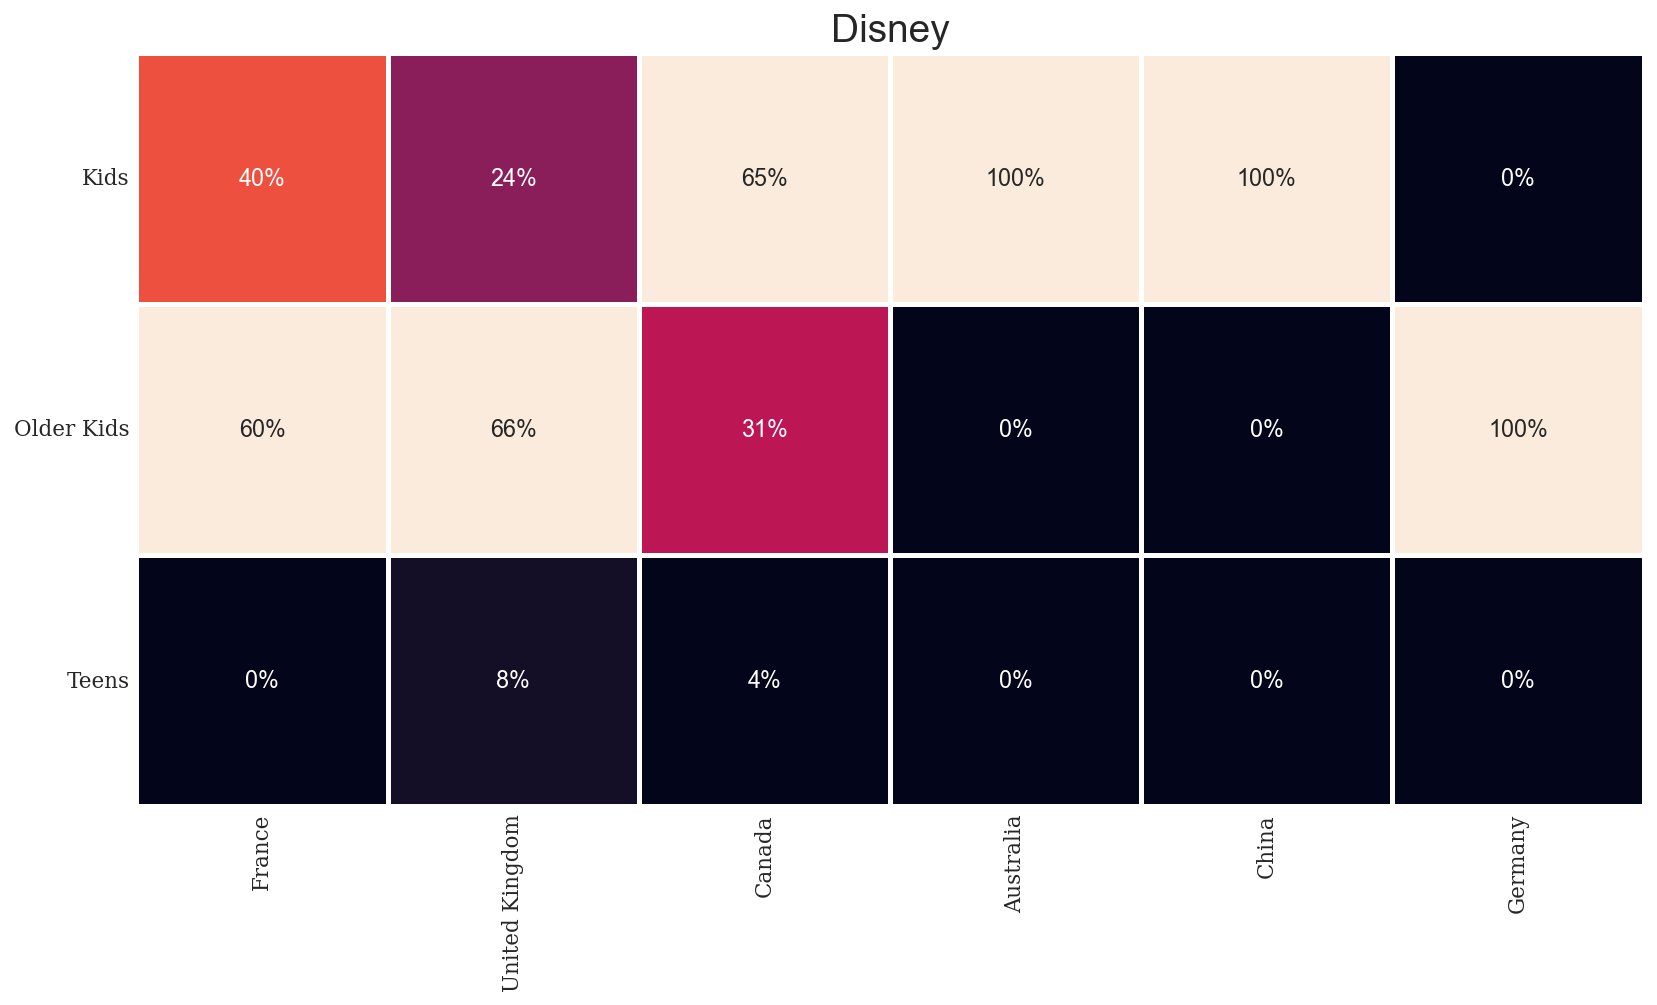

In [48]:
data = disney.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['first_country']

disney_heatmap = disney.loc[disney['first_country'].isin(data)]

#Viz
disney_heatmap = pd.crosstab(disney_heatmap['first_country'],disney_heatmap['target_ages'],normalize = "index").T
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order = ['France','United Kingdom','Canada','Australia','China','Germany']

age_order = ['Kids','Older Kids','Teens']

sns.heatmap(disney_heatmap.loc[age_order,country_order],square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.title('Disney',size="20")

ax.spines['top'].set_visible(True)


ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()